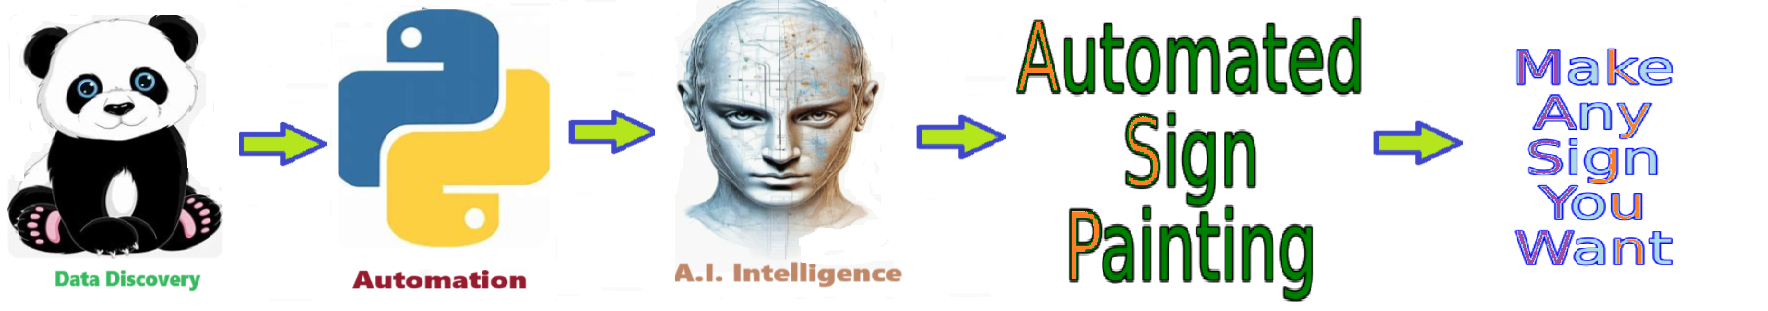

#### by Joe Eberle started on 05-23-2023 - https://github.com/JoeEberle/ - josepheberle@outlook.com

## 🎨🖌️  Create Solution Sign

The **create_solution_sign** function generates a unique sign for each solution name, ensuring distinct visual representation for every solution.

**Automated sign painting** utilizes computerized systems to create signage with precision and efficiency. These systems can generate signs of any font size or color, allowing for versatility in design. By leveraging automated processes, businesses can produce signage quickly and accurately, saving time and resources. Additionally, the signs are typically saved as .PNG files, ensuring compatibility across various platforms and ease of distribution. This approach streamlines the sign-making process, resulting in high-quality output while minimizing manual labor and errors.

**Matplotlib** is a powerful Python library for creating static, interactive, and animated **visualizations**. It offers a wide range of plotting functionalities, enabling users to generate high-quality graphs, charts, and plots for data analysis and presentation purposes.
s.s.

In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import create_sign as cs
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
import story_board as sb
import time
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2025-11-12 at 10:48:06.938842


#### Required Setup Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'create_solution_sign'

#### Required Setup Step 0 - Intitiate Logging and debugging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process create_solution_sign Step 0 - Initializing and starting Logging Process.


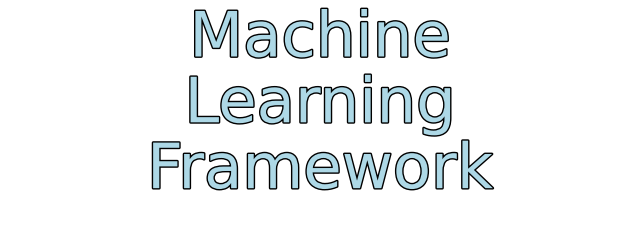

In [4]:
# Example usage:
phrase = "Machine Learning Framework"
plt = cs.create_stacked_sign(phrase, font_size=45, font_color='lightblue', background_color='black', glow_color='black')

file_name = "Machine Learning.png" 
plt.savefig(file_name, bbox_inches='tight', pad_inches=0, transparent=True)

plt.show()

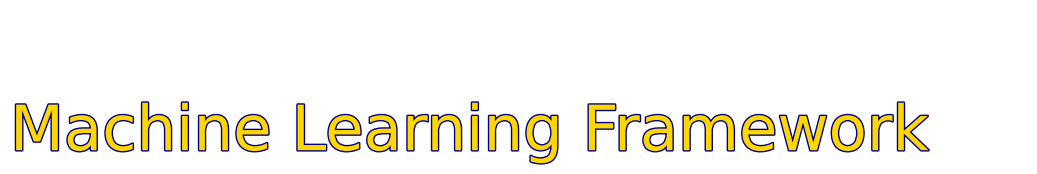

In [5]:
# Example usage:
phrase = "Machine Learning Framework"
plt = cs.create_sign(phrase, font_size=45, font_color='gold', background_color='black', glow_color='darkblue')
filename = "sample_sign.png"
cs.persist_plt(plt,filename)
plt.show()

In [6]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter

def neon_sign(text, font_path=None, font_size=180,
              fg="#FAFAFA", glow="#00F0FF",
              bg="#0B0B14", glow_radius=16, pad=80, strokes=3, out="sign.png"):
    # font
    font = ImageFont.truetype(font_path, font_size) if font_path else ImageFont.load_default()
    # measure
    temp = Image.new("RGBA", (1,1)); d = ImageDraw.Draw(temp)
    bbox = d.textbbox((0,0), text, font=font)
    w, h = bbox[2]-bbox[0], bbox[3]-bbox[1]
    W, H = w + 2*pad, h + 2*pad

    # layers
    base = Image.new("RGBA", (W, H), bg)
    glow_layer = Image.new("RGBA", (W, H), (0,0,0,0)); dg = ImageDraw.Draw(glow_layer)
    xy = (pad, pad)

    # thick underpaint for glow
    for r, alpha in [(glow_radius*2, 60), (glow_radius, 100), (glow_radius//2, 140)]:
        g = Image.new("RGBA", (W, H), (0,0,0,0)); gg = ImageDraw.Draw(g)
        for _ in range(strokes):
            gg.text(xy, text, font=font, fill=glow)
        g = g.filter(ImageFilter.GaussianBlur(r))
        glow_layer = Image.alpha_composite(glow_layer, g.putalpha(alpha) or g)

    # face (add inner stroke for “tube” look)
    face = Image.new("RGBA", (W, H), (0,0,0,0)); df = ImageDraw.Draw(face)
    df.text(xy, text, font=font, fill=fg, stroke_width=2, stroke_fill="#FFFFFF")

    out_im = Image.alpha_composite(base.convert("RGBA"), glow_layer)
    out_im = Image.alpha_composite(out_im, face)
    out_im.save(out)
    return out




In [7]:
# # Example:
# neon_sign("CREATE SOLUTION SIGN", font_path="C:/Windows/Fonts/LEMONMILK-Regular.otf")

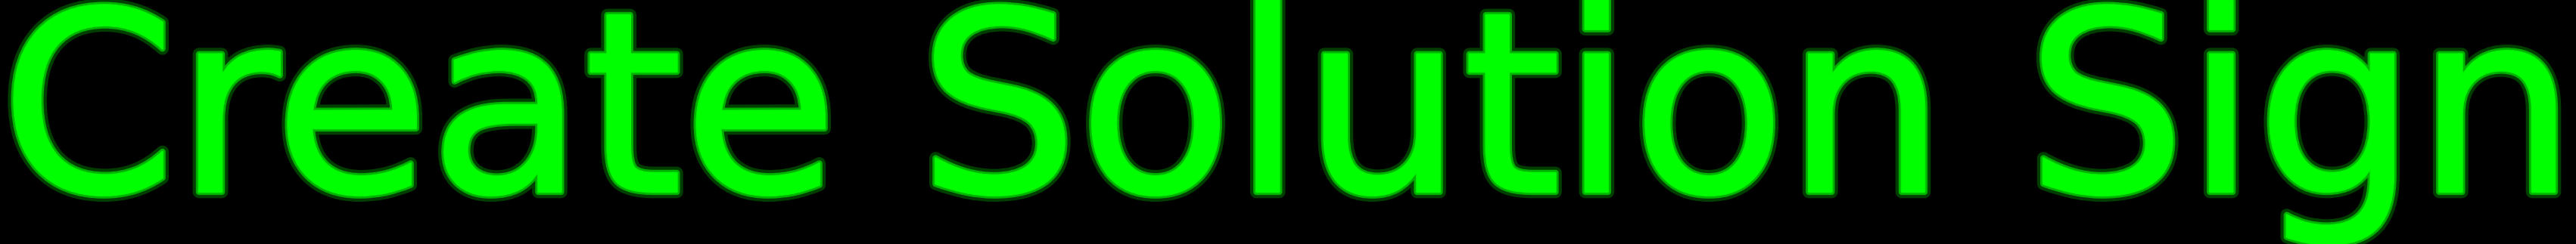

In [8]:
from IPython.display import Image, display; display(Image("sign.png"))

In [9]:
from PIL import Image,ImageDraw,ImageFilter,ImageFont; W,H=1200,360; T="HealtheIntelligence"; img=Image.new("RGBA",(W,H),"#0B0B14"); d=ImageDraw.Draw(img); f=ImageFont.load_default(); bb=d.textbbox((0,0),T,font=f); x,y=(W-bb[2])//2,(H-bb[3])//2; g=Image.new("RGBA",(W,H),(0,0,0,0)); ImageDraw.Draw(g).text((x,y),T,font=f,fill="#00F0FF"); img=Image.alpha_composite(img,g.filter(ImageFilter.GaussianBlur(18))); ImageDraw.Draw(img).text((x,y),T,font=f,fill="#FAFAFA"); img.save("sign.png")

In [10]:
cs.create_sign_II("create_solution_sign", save_path="sign.png")

C:\Users\josep\create_solution_sign\create_sign.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout(pad=0)


'sign.png'

In [11]:
full_path_to_registry_filename = "C://users//josep//solution_registry//solution_registry.xlsx"
df_solution_registry = pd.read_excel(full_path_to_registry_filename, index_col=None) 
df_solution_registry = df_solution_registry.sort_values(by='solution_directory')
print(f"Found {df_solution_registry.shape[0]} solutions") 
df_solution_registry.head()

Found 145 solutions


solution_name         solution_directory  \
3                   Ai Chatbot                 AI Chatbot   
7             Ai Grading Plans           AI Grading Plans   
2                     Ai Agent                   AI_Agent   
6    Ai Grading Plan Assistant  AI_Grading_Plan_Assistant   
123       ai_chatbot_scorecard       AI_chatbot_scorecard   

                                   solution_definition  \
3    AI chatbot using LLMS and RAG to ethically ans...   
7    Utilizing AI in innovative ways to enhance the...   
2    Use uagent to Create AI agents to perform work...   
6    Utilizing an AI Assistant in innovative ways t...   
123  The 7 Layer System Response Score is a compreh...   

                                  solution_description  
3    AI chatbot using LLMS and RAG to ethically ans...  
7    Utilizing AI in innovative ways to enhance the...  
2    Use uagent to Create AI agents to perform work...  
6    Utilizing an AI Assistant in innovative ways t...  
123  The 7 Layer System Response Score is a compreh...

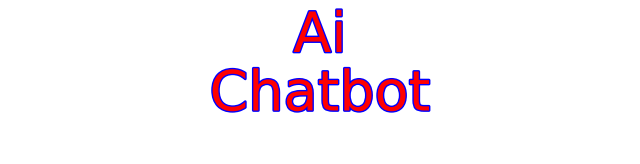

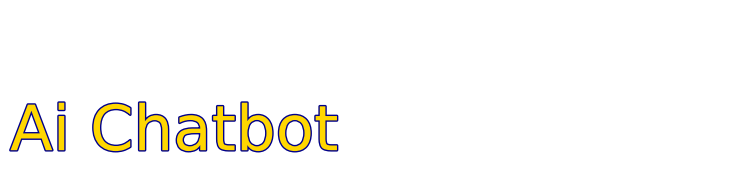

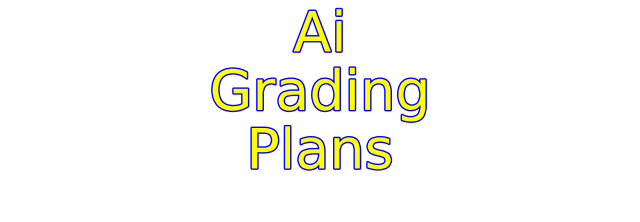

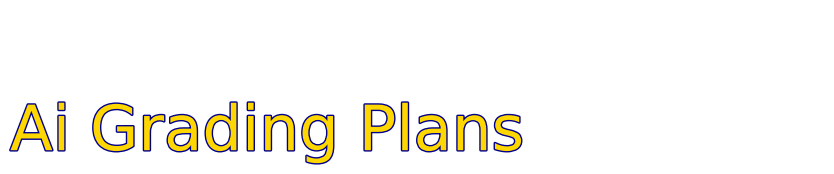

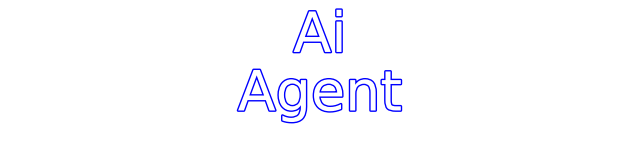

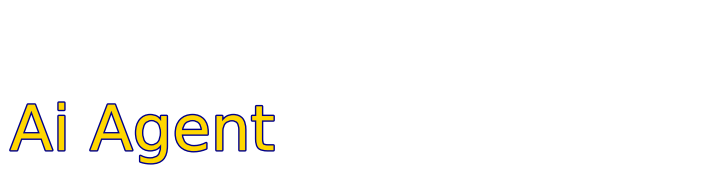

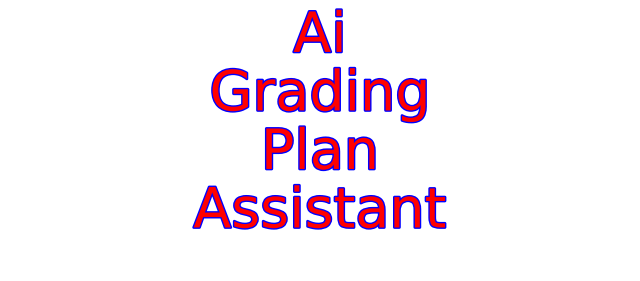

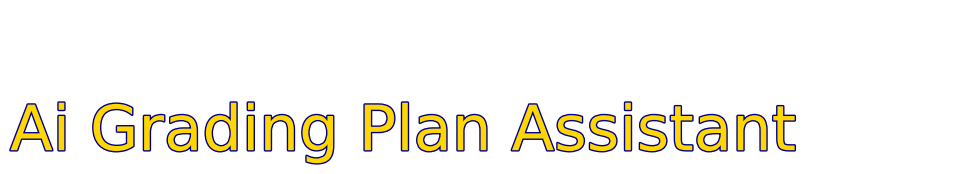

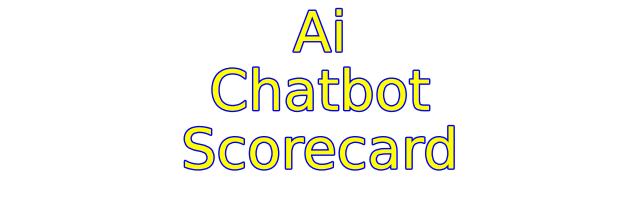

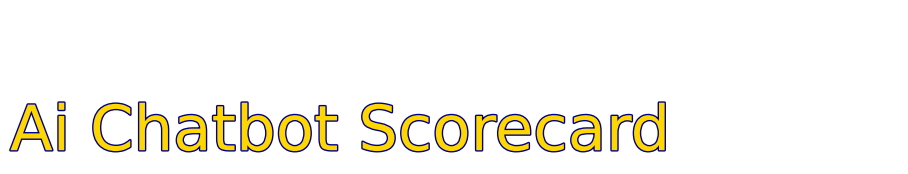

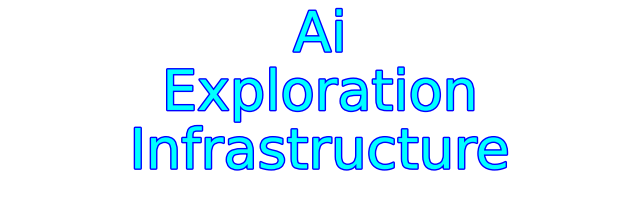

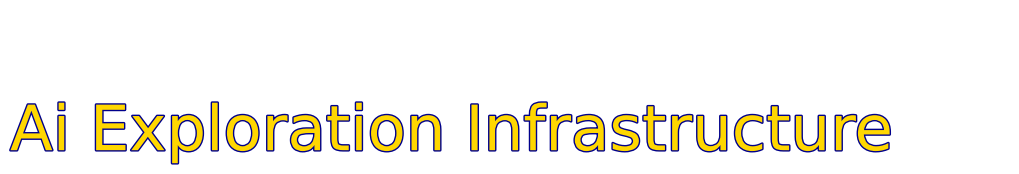

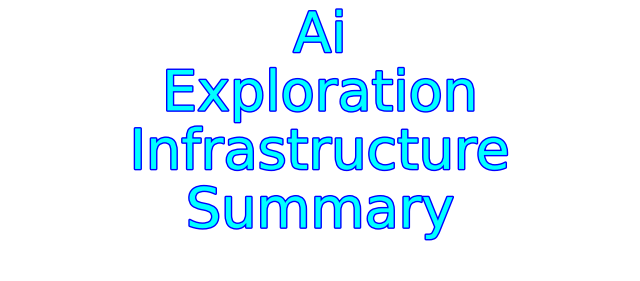

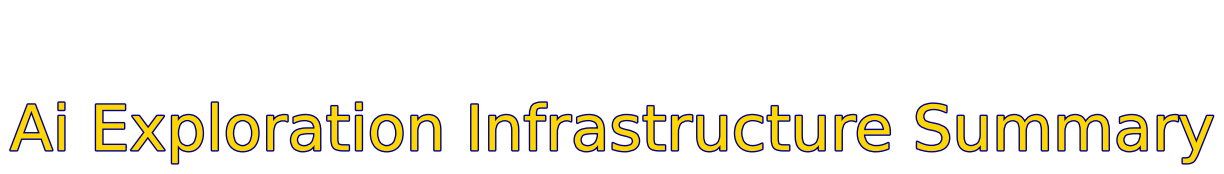

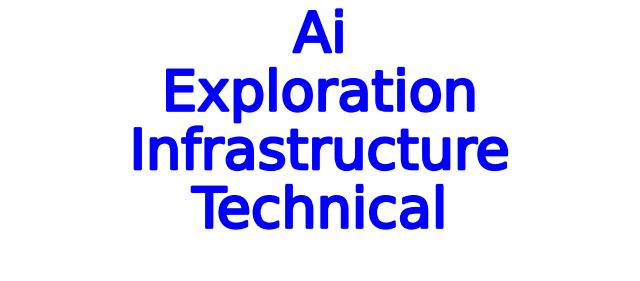

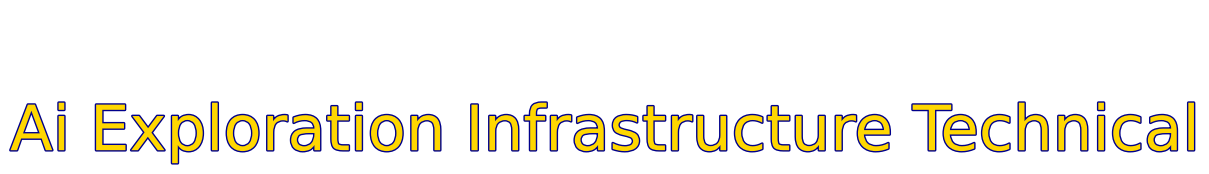

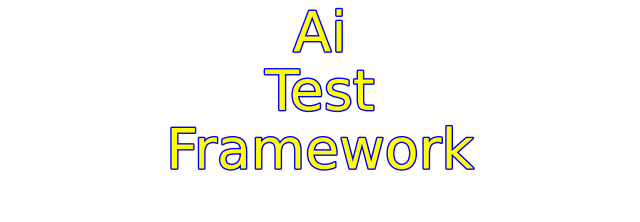

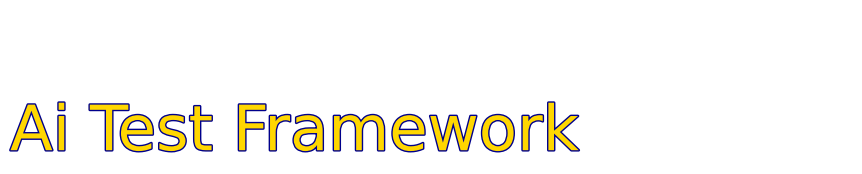

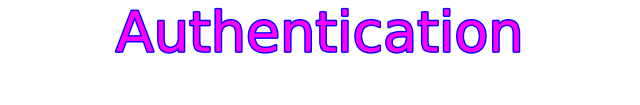

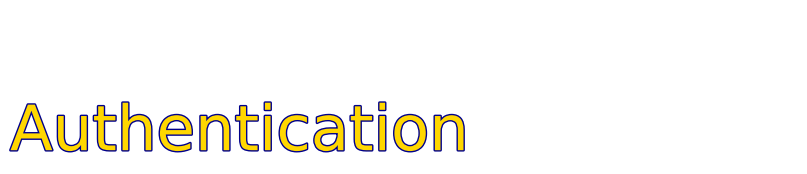

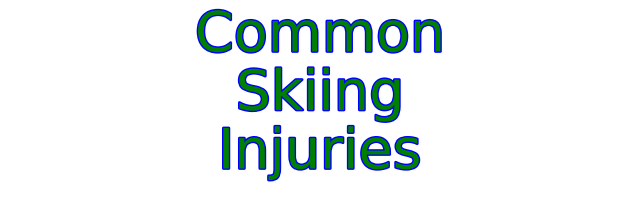

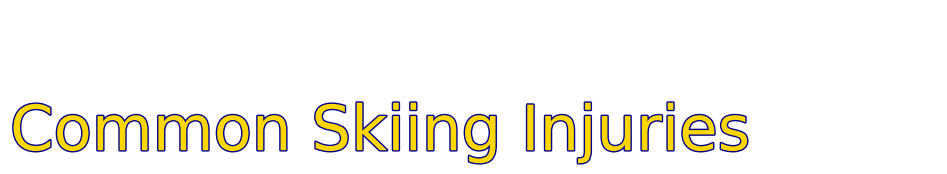

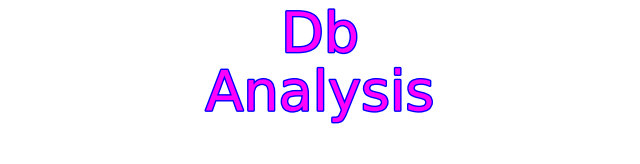

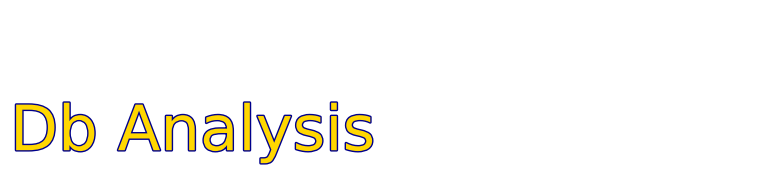

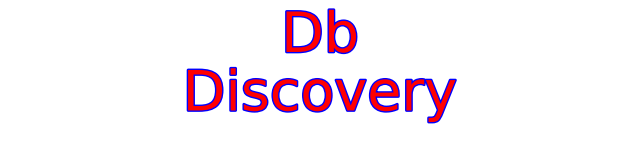

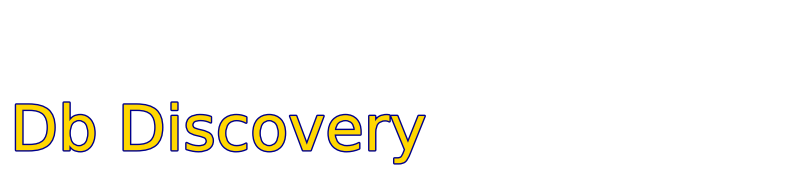

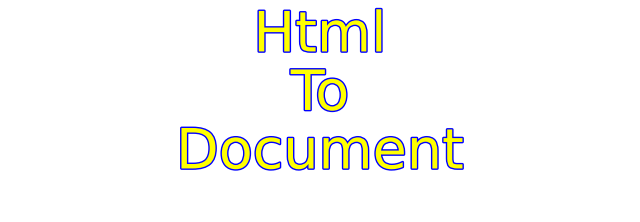

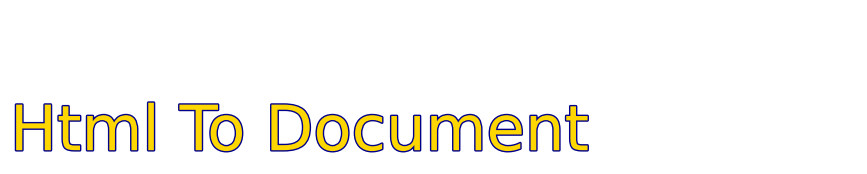

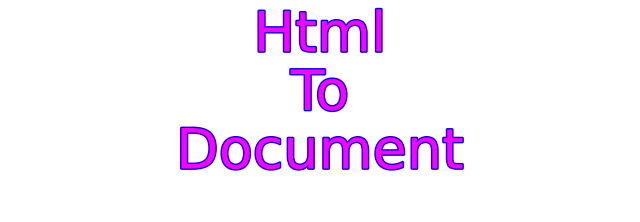

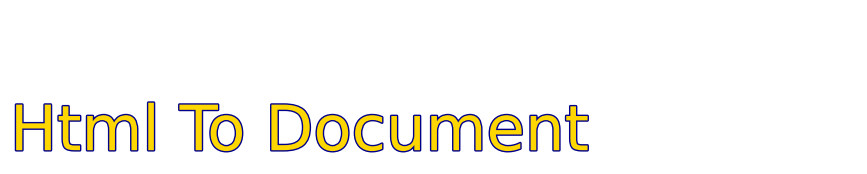

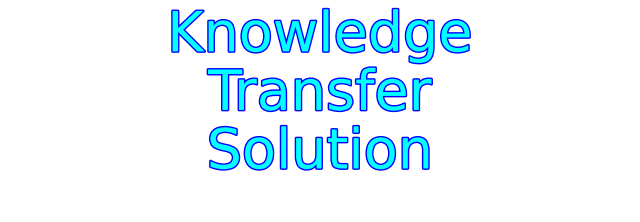

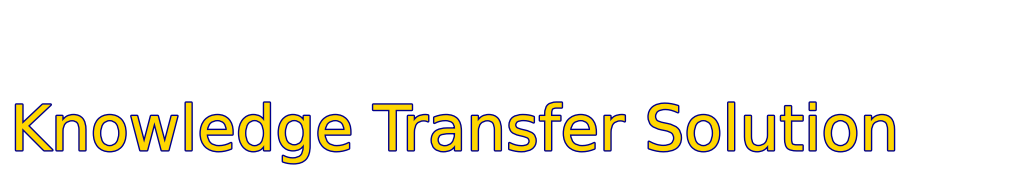

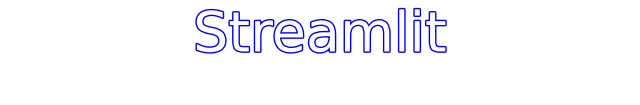

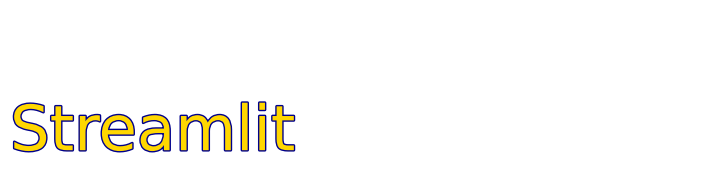

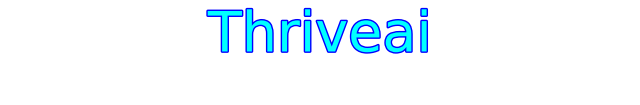

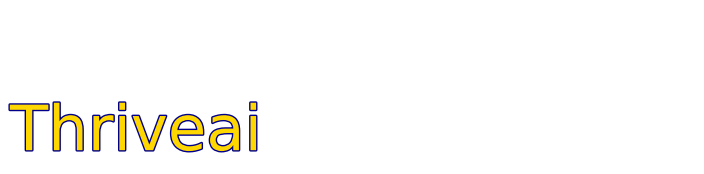

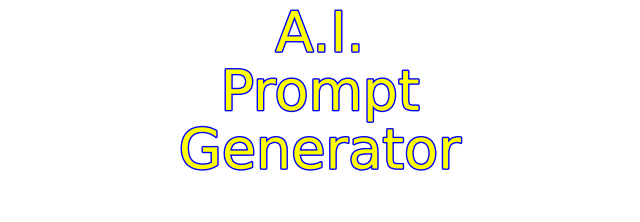

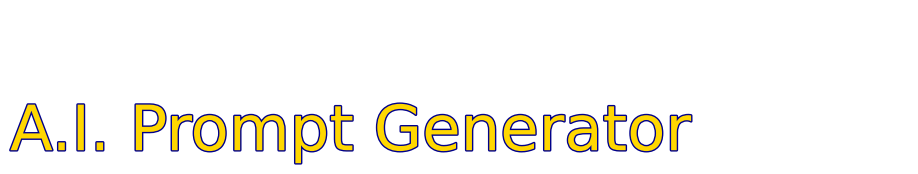

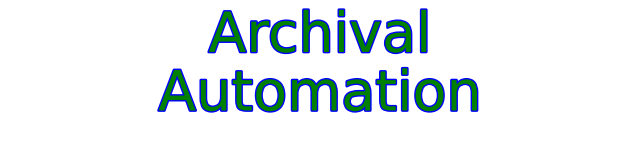

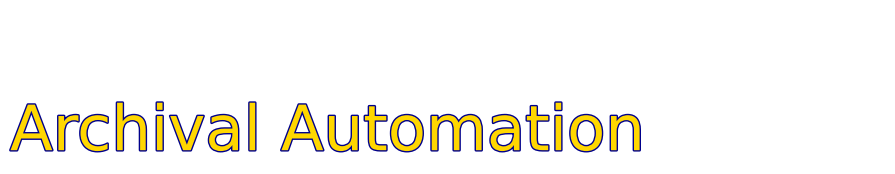

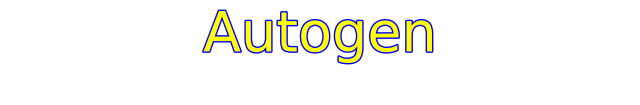

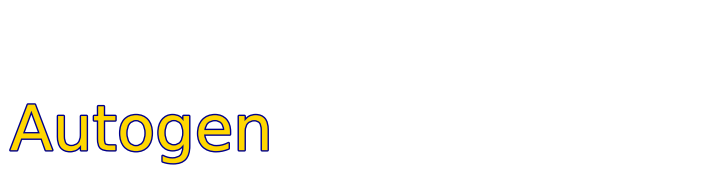

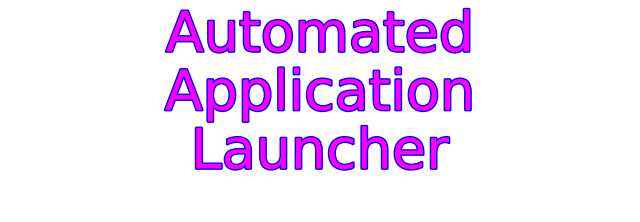

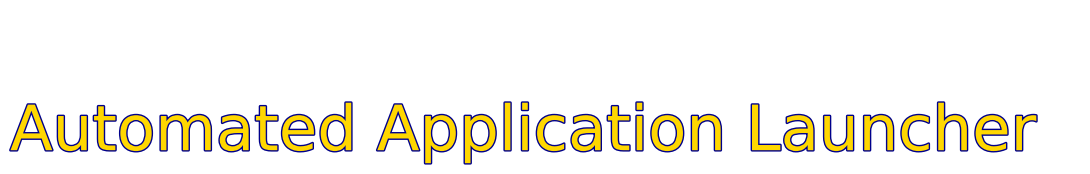

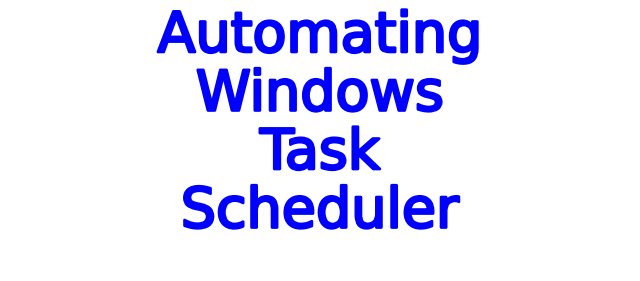

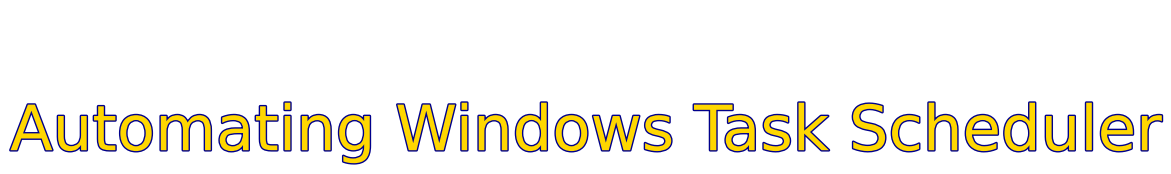

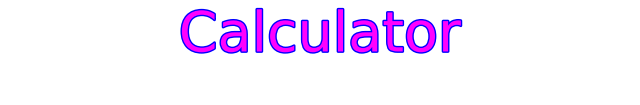

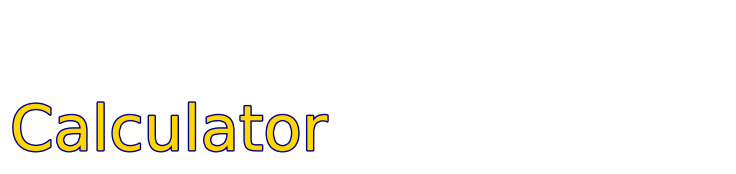

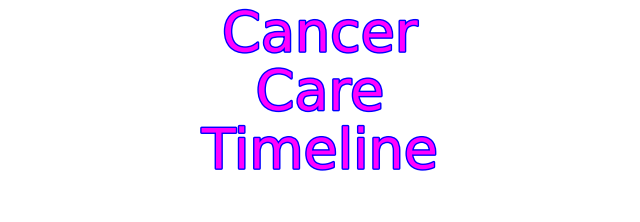

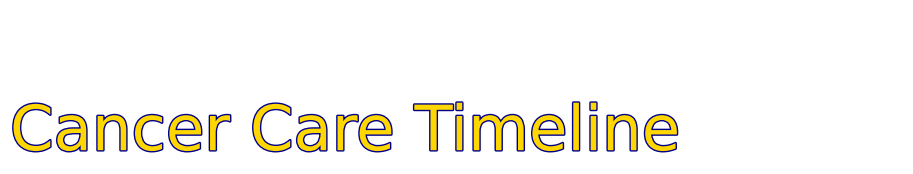

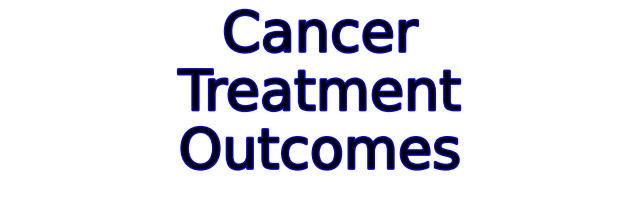

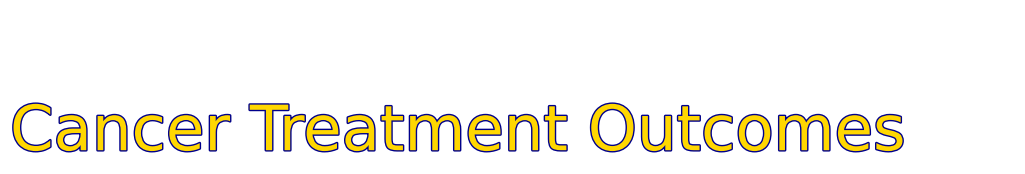

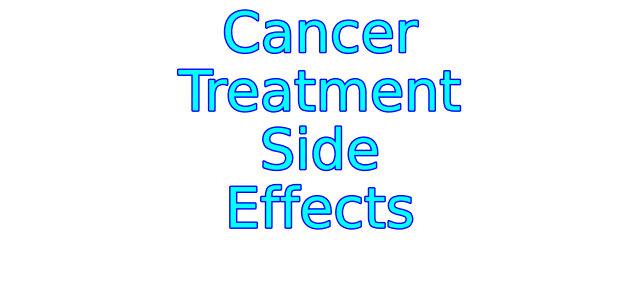

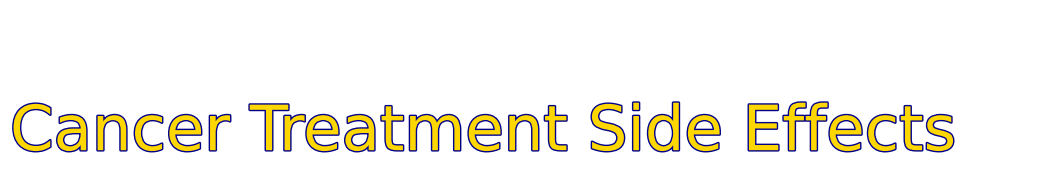

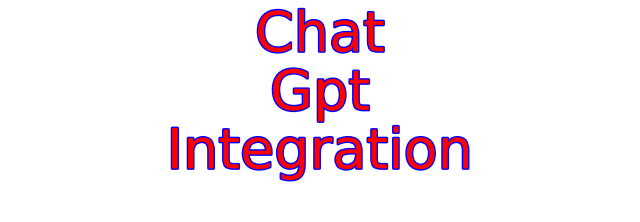

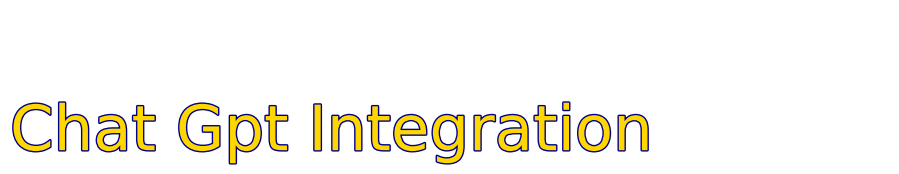

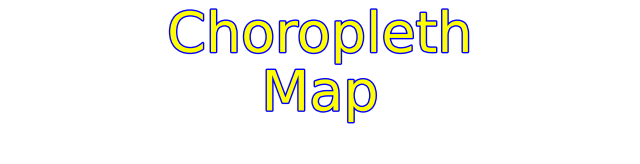

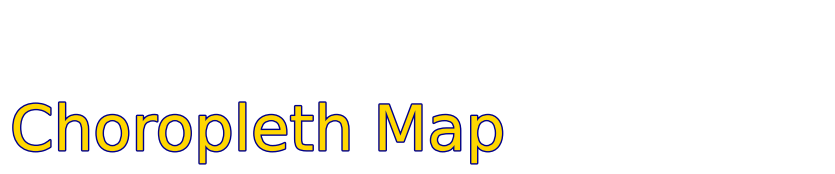

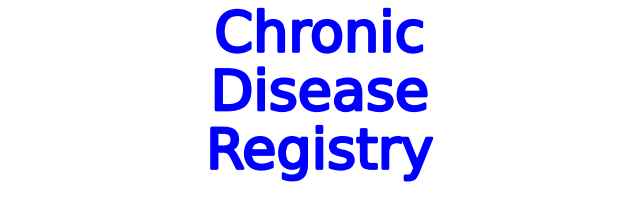

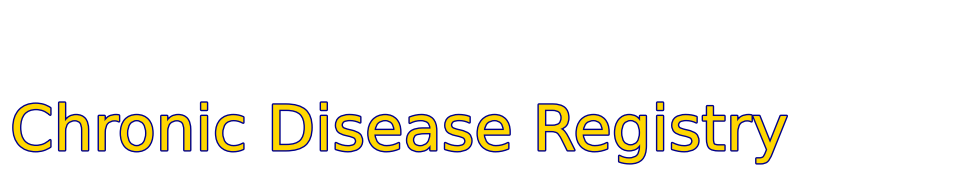

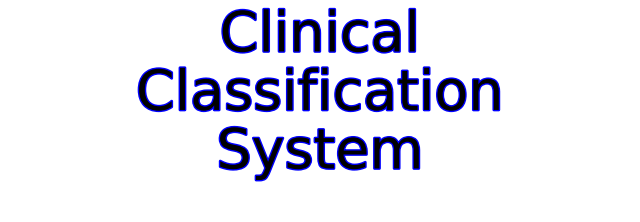

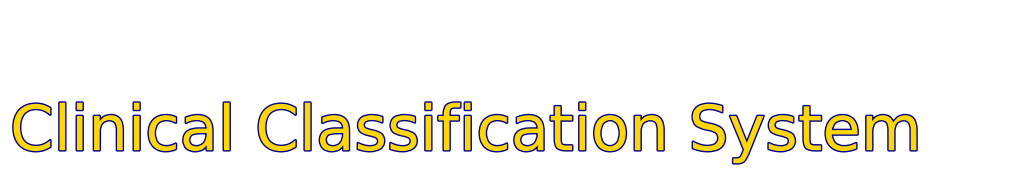

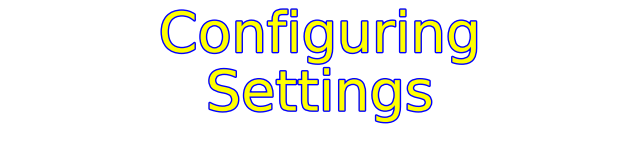

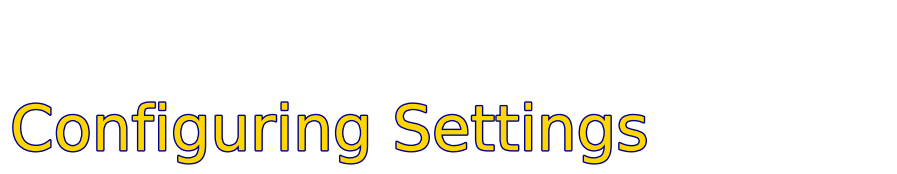

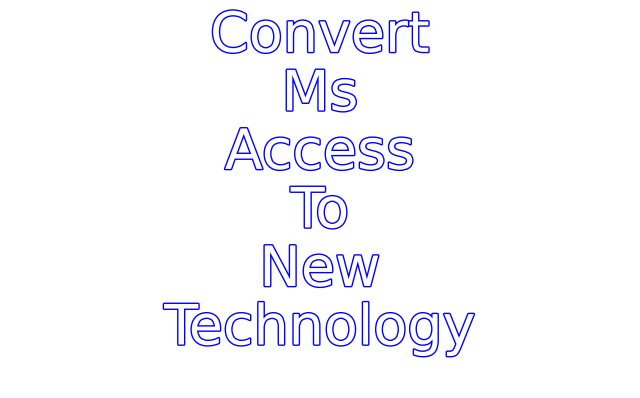

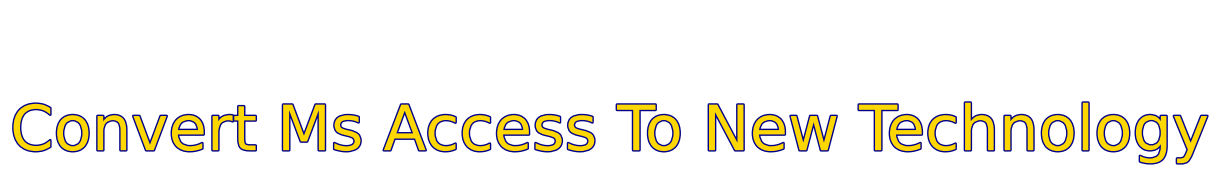

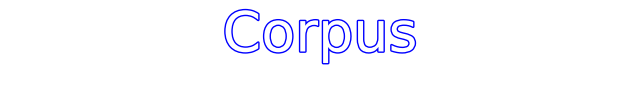

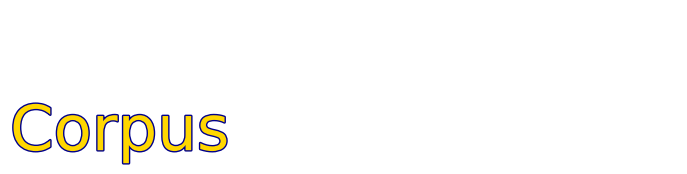

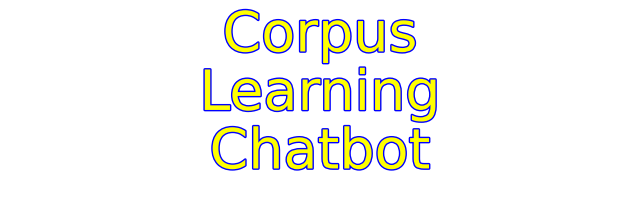

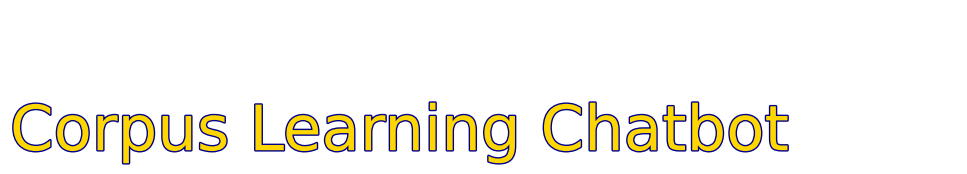

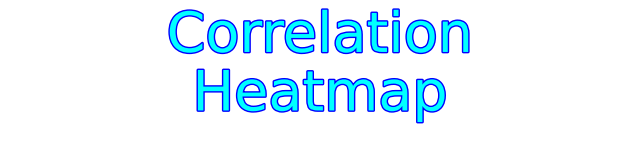

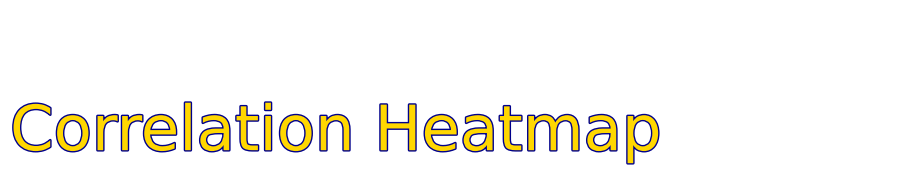

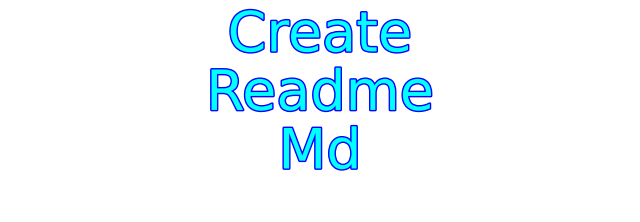

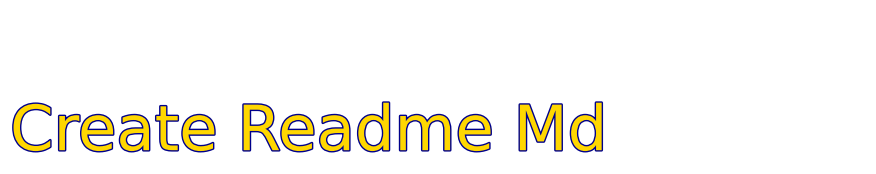

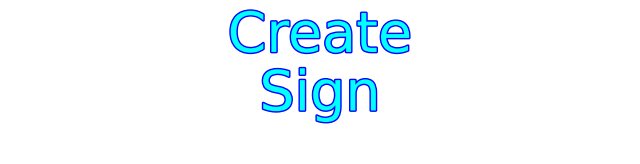

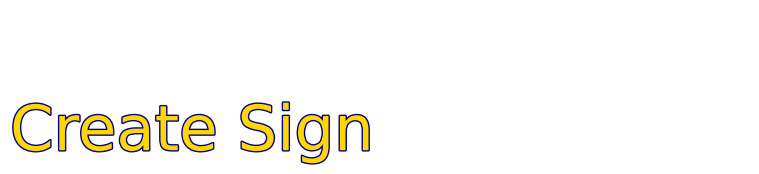

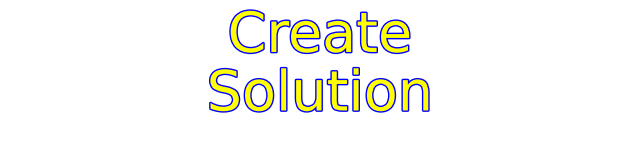

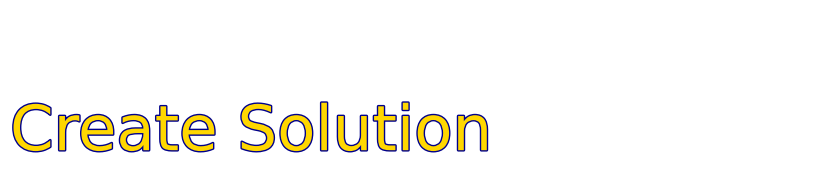

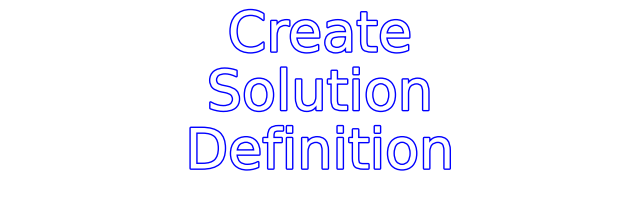

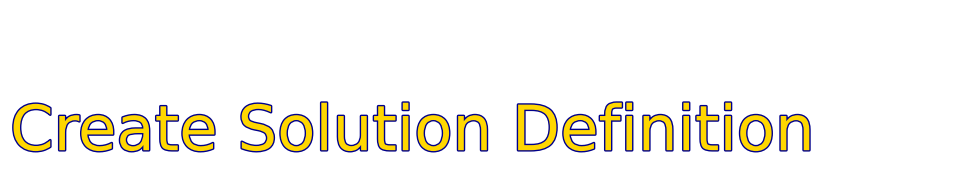

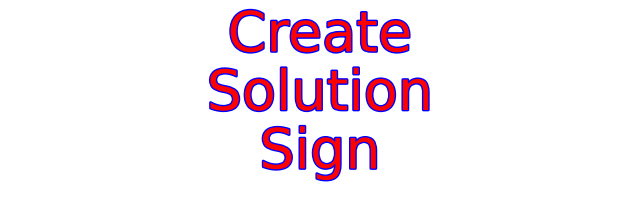

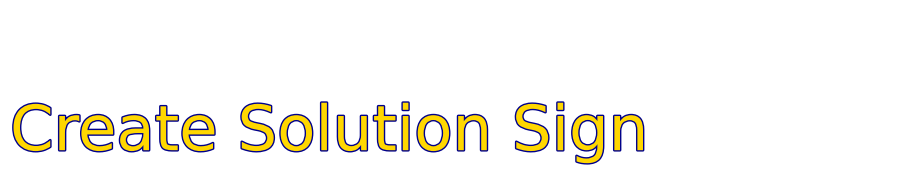

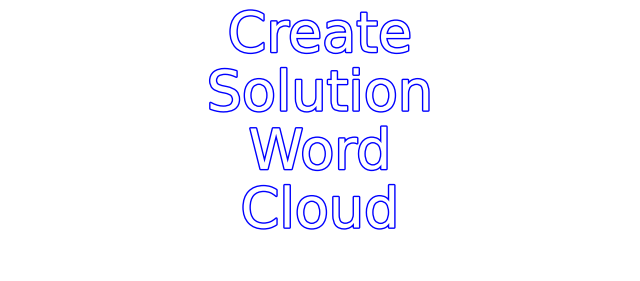

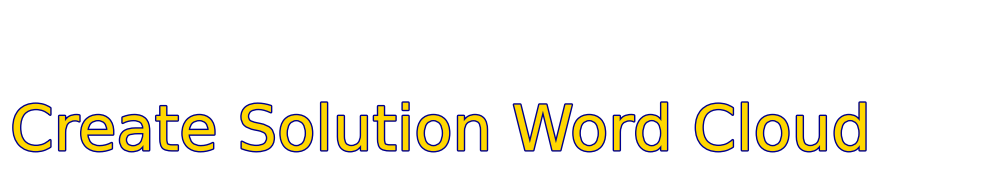

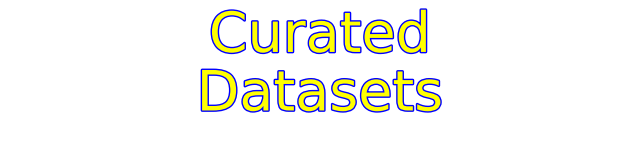

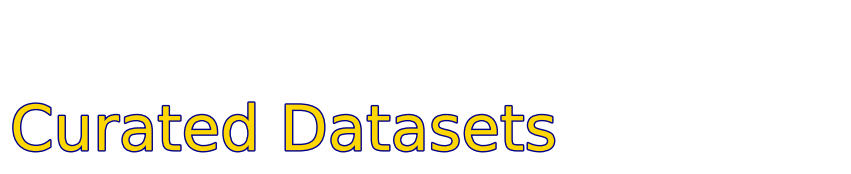

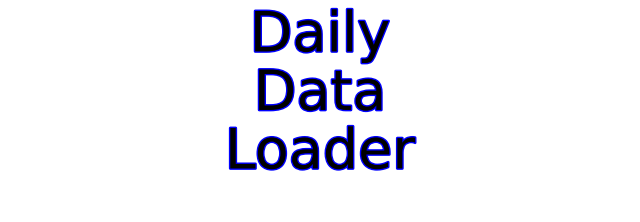

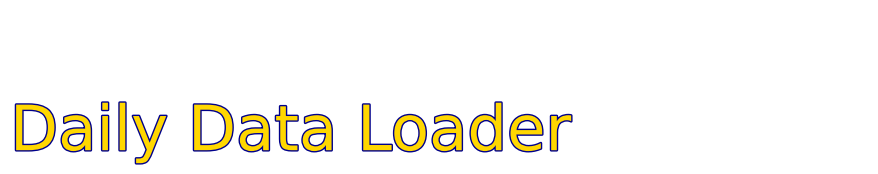

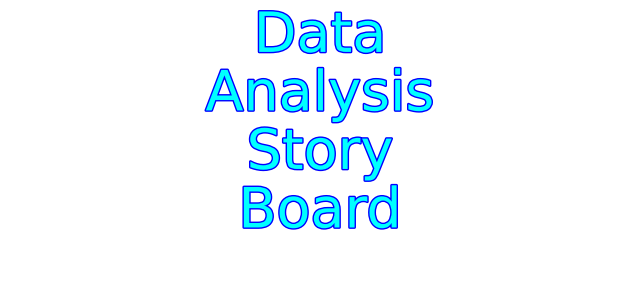

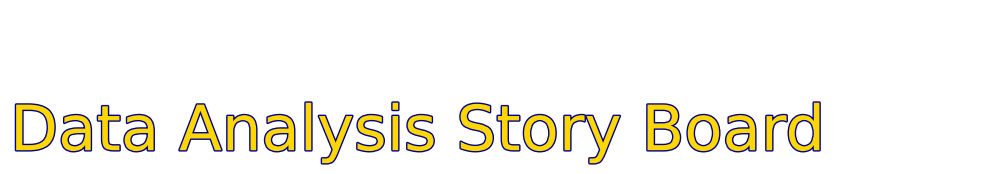

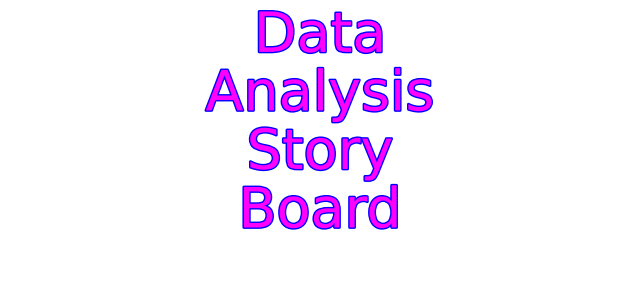

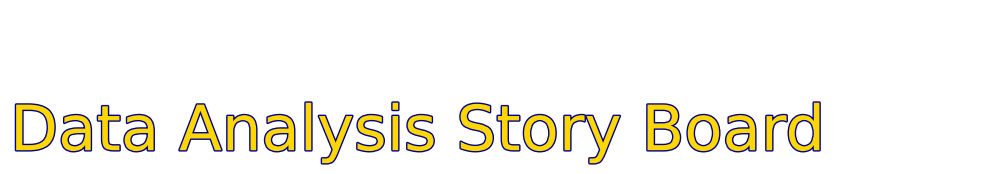

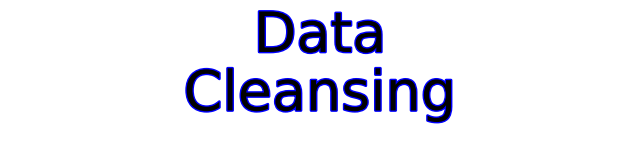

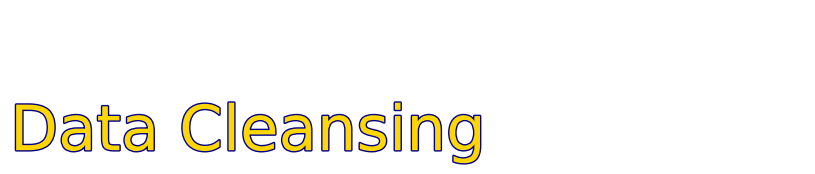

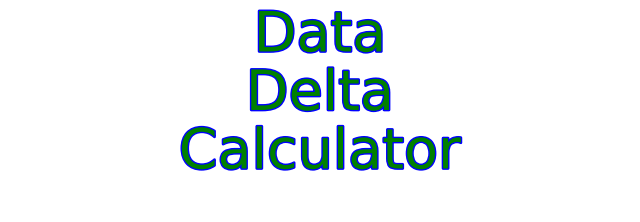

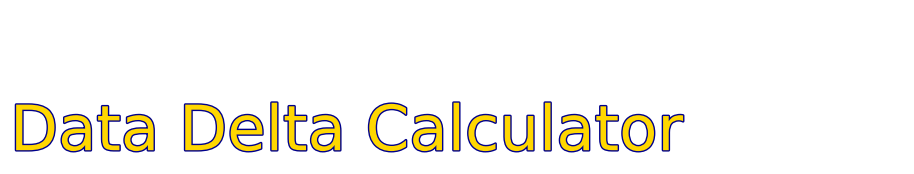

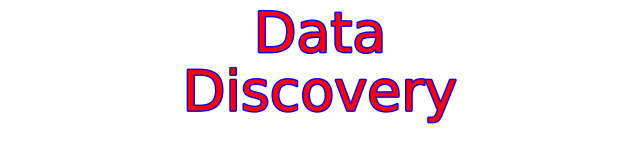

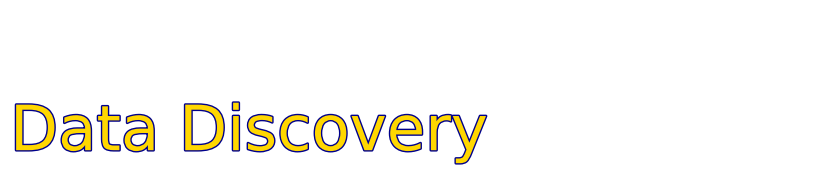

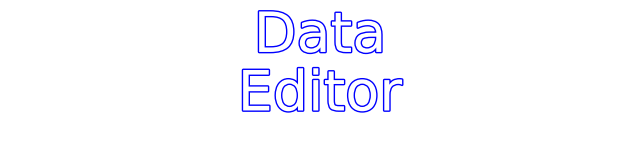

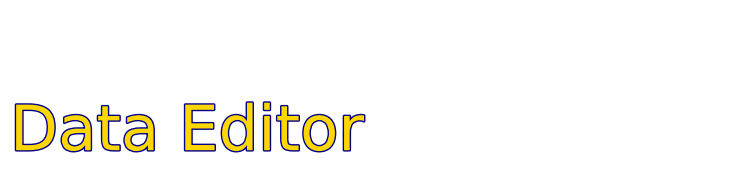

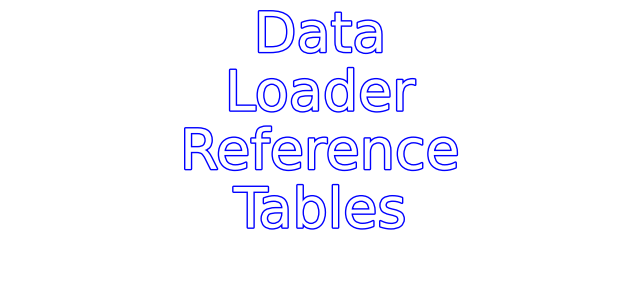

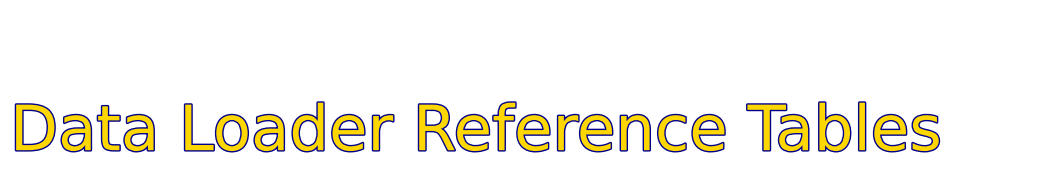

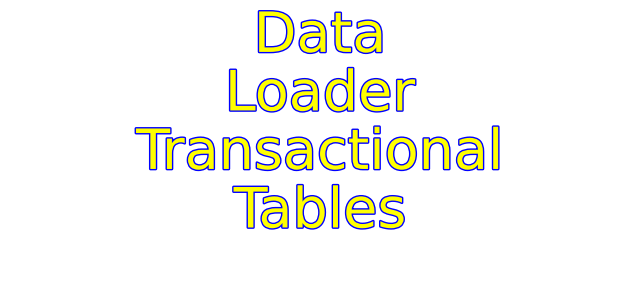

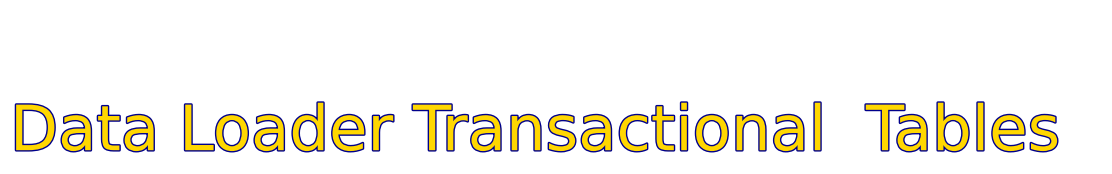

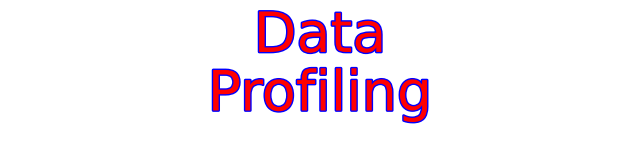

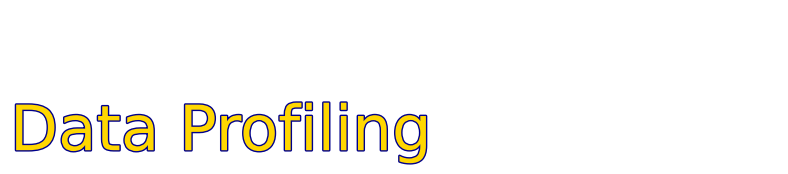

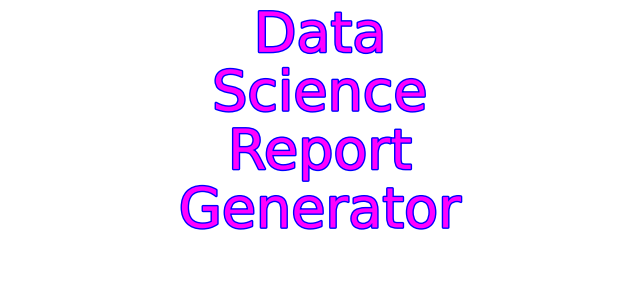

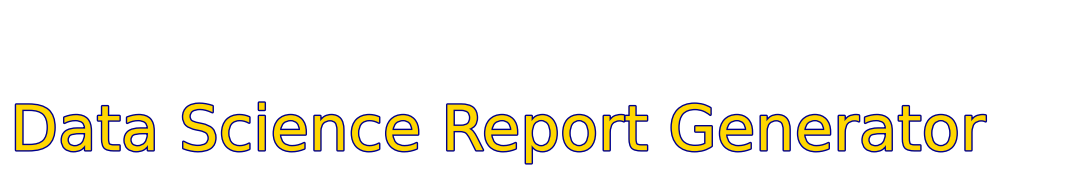

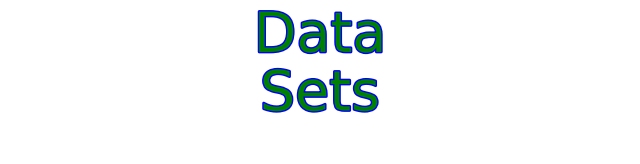

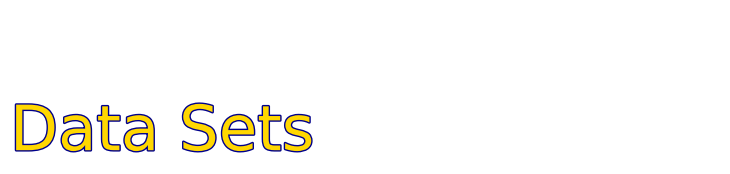

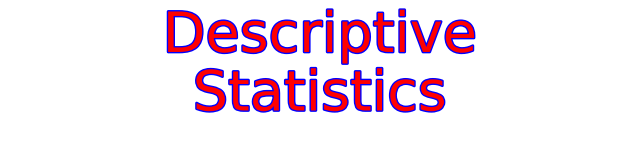

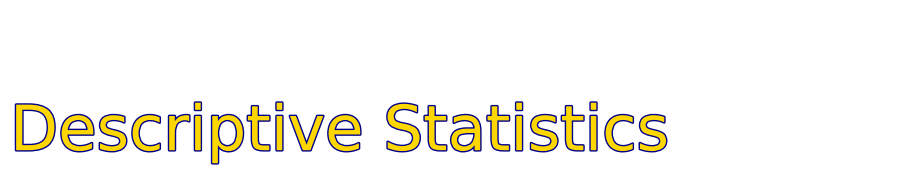

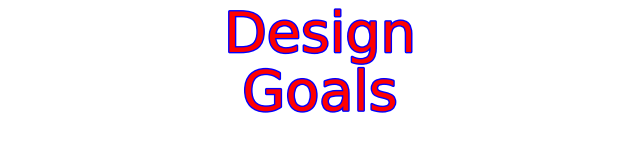

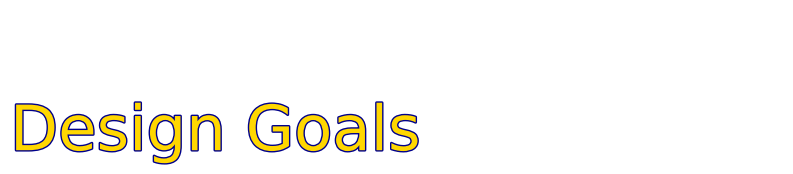

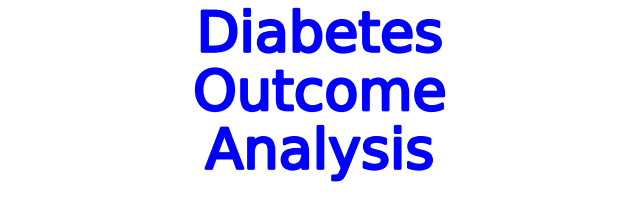

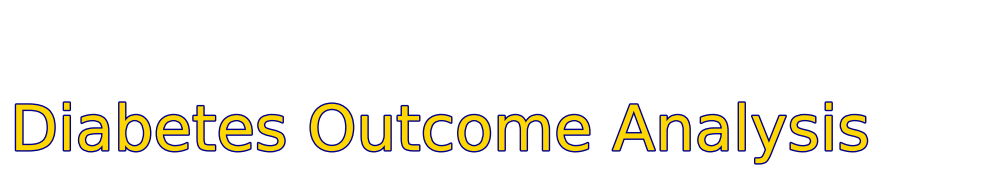

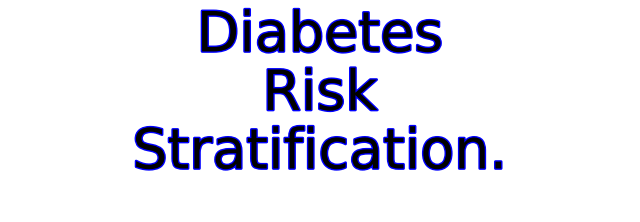

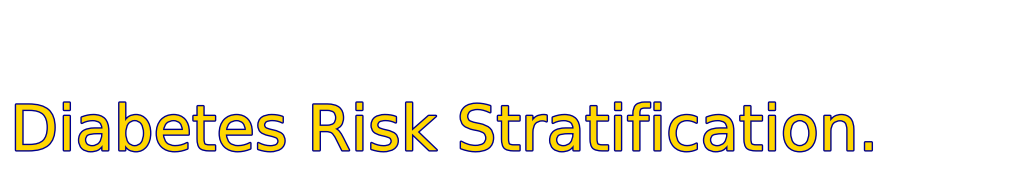

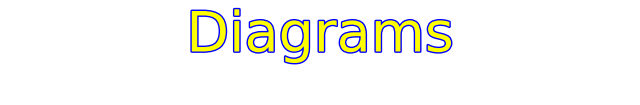

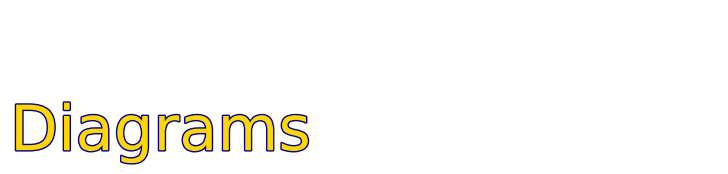

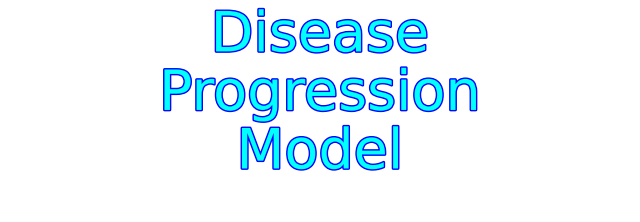

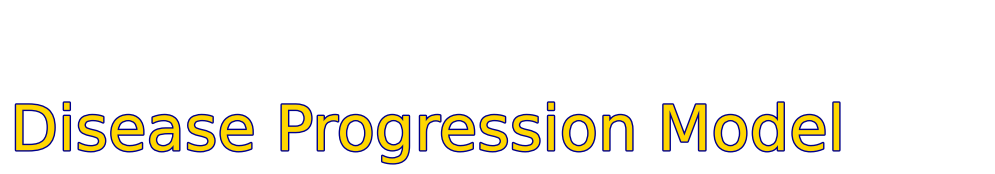

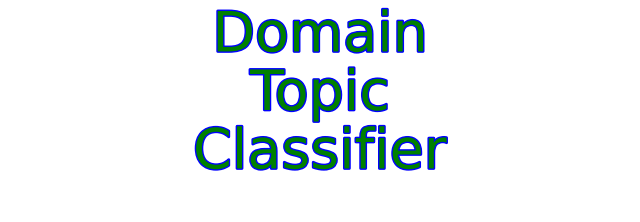

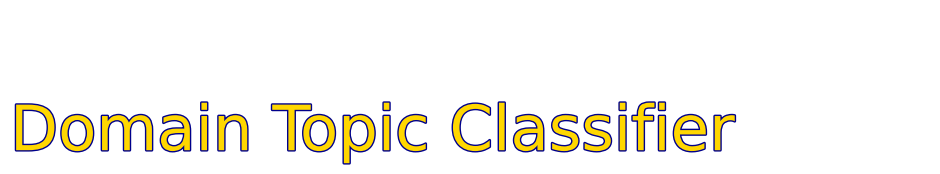

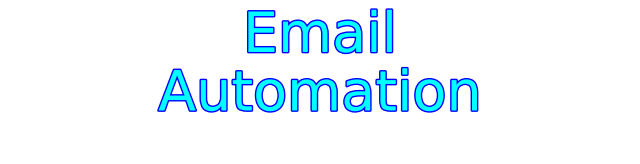

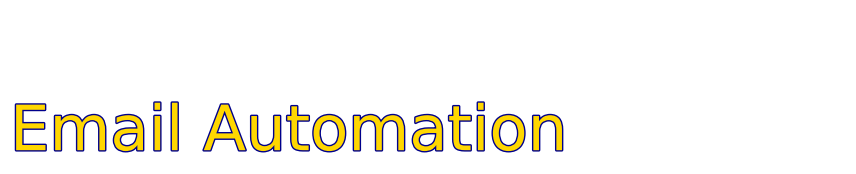

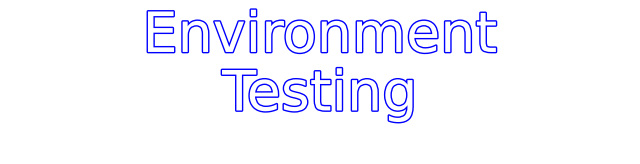

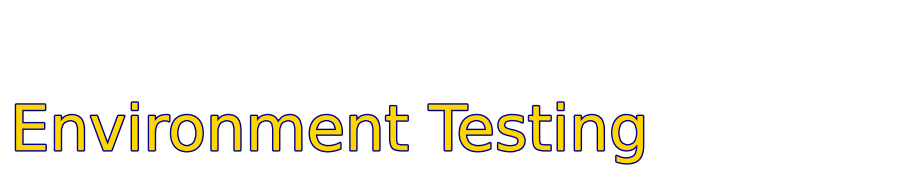

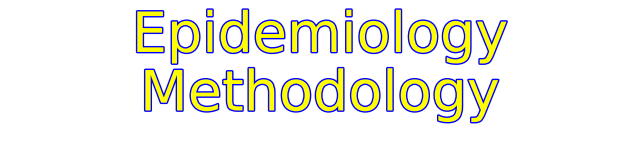

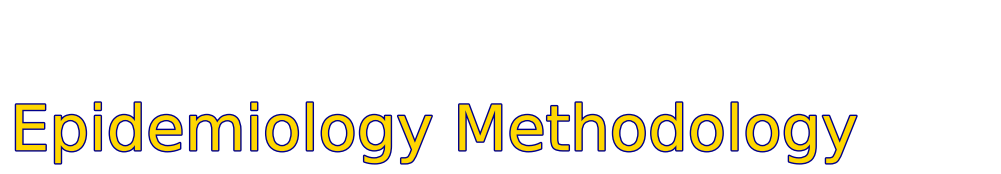

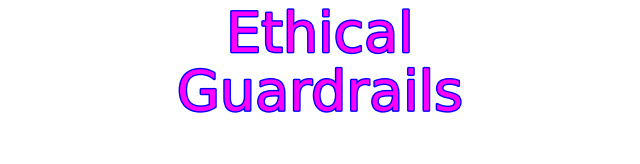

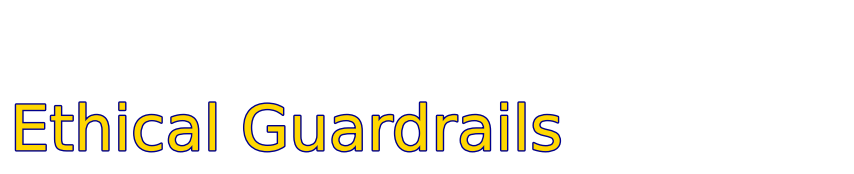

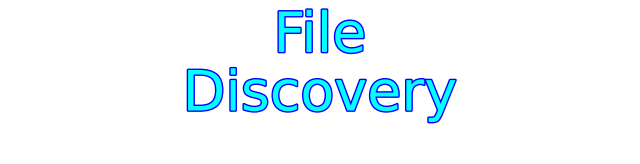

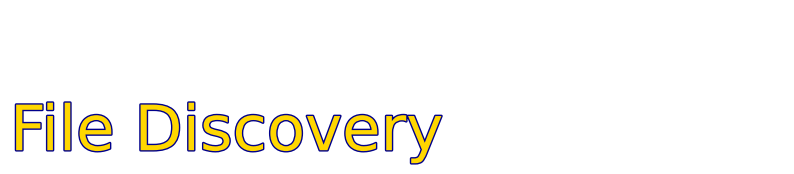

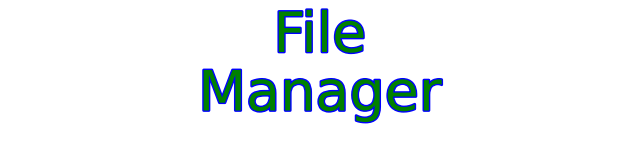

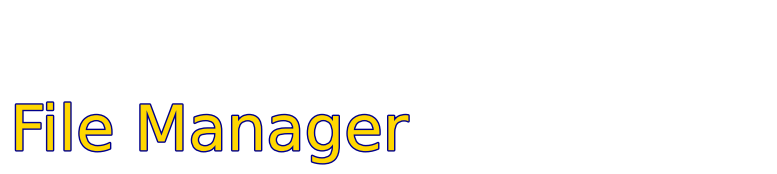

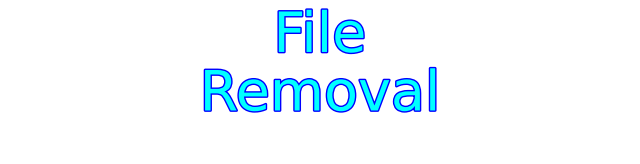

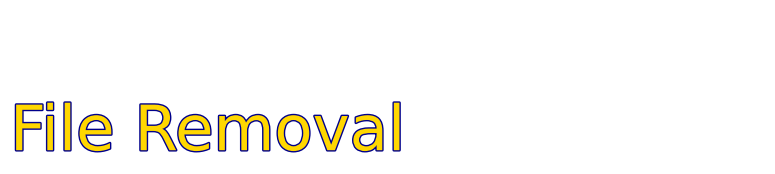

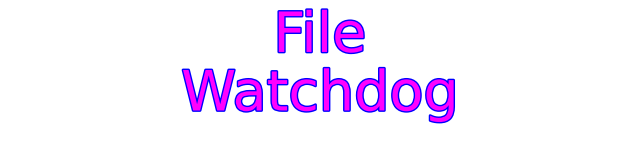

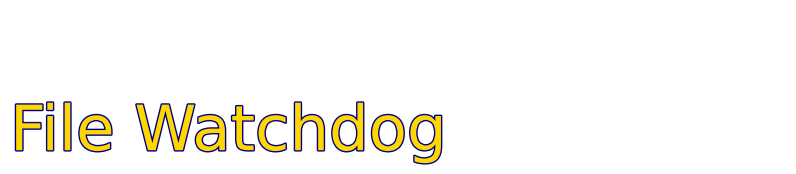

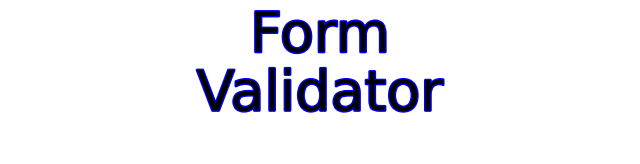

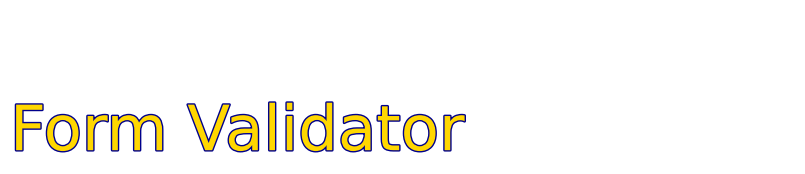

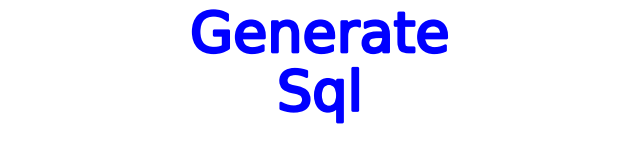

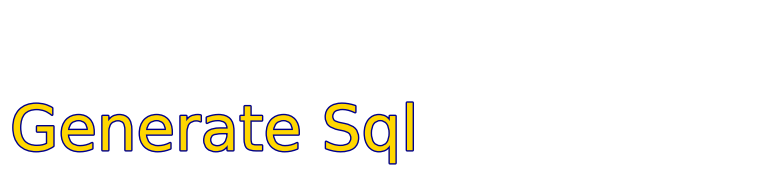

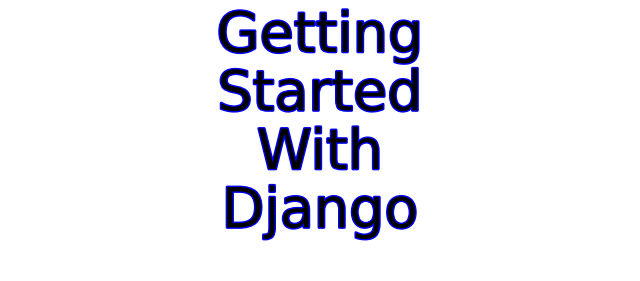

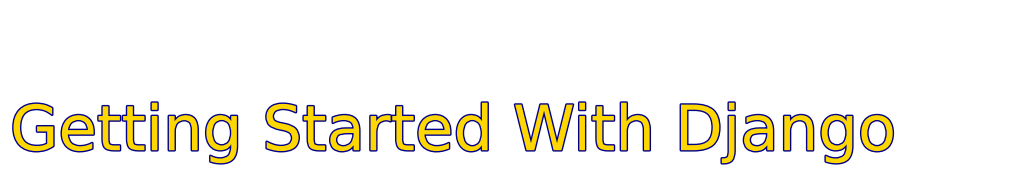

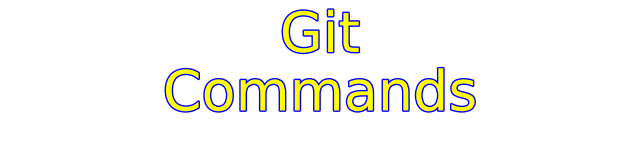

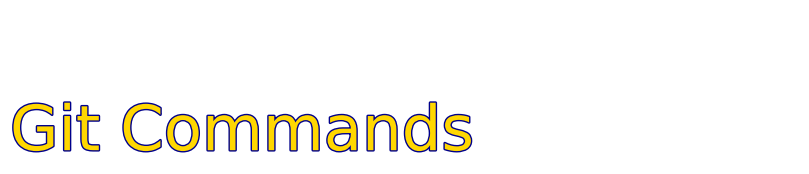

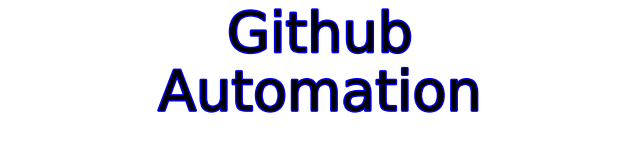

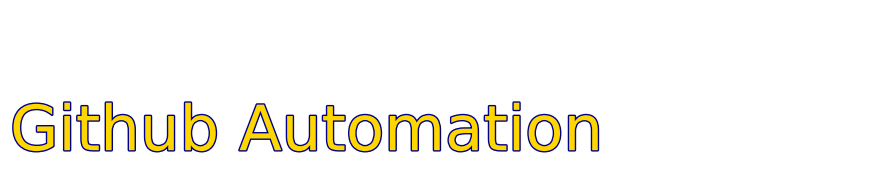

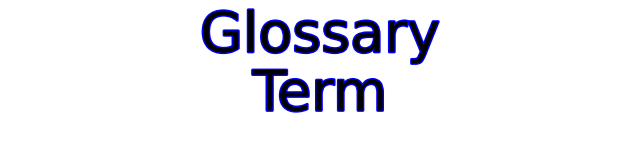

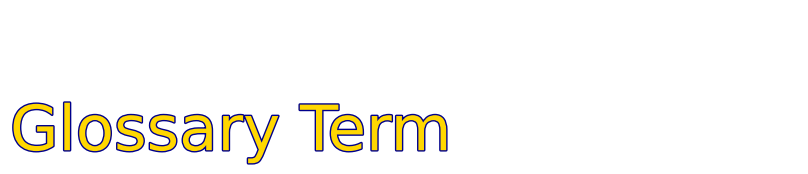

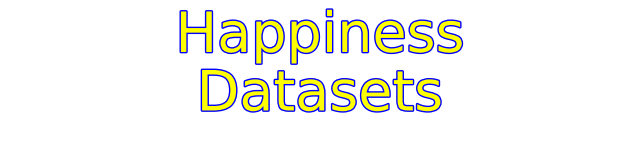

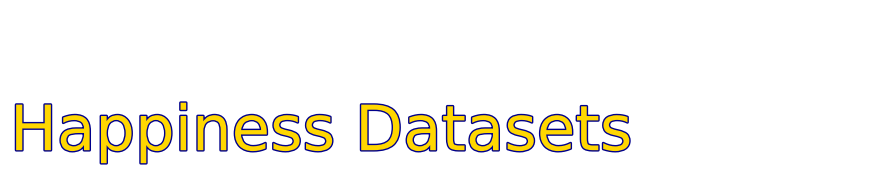

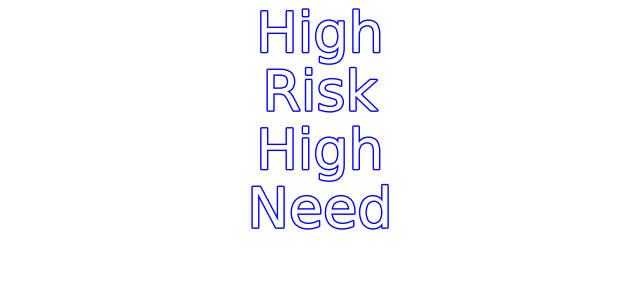

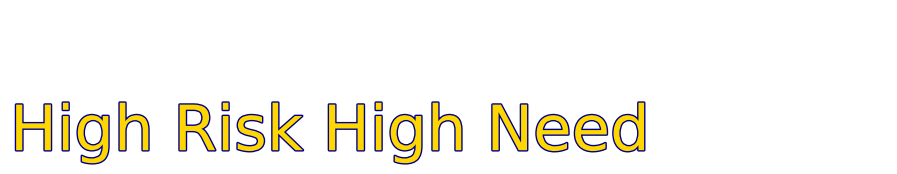

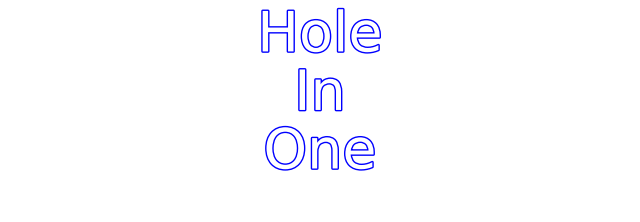

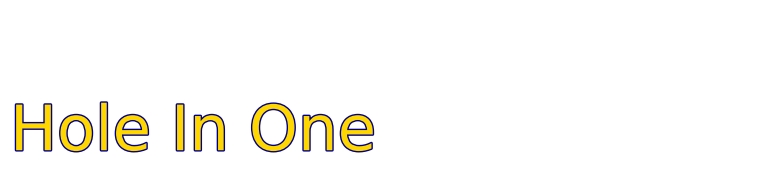

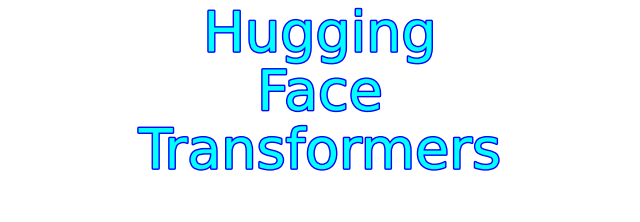

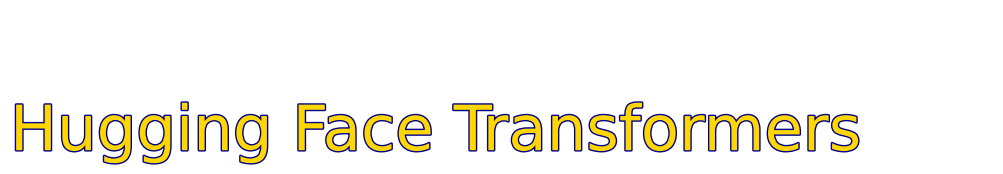

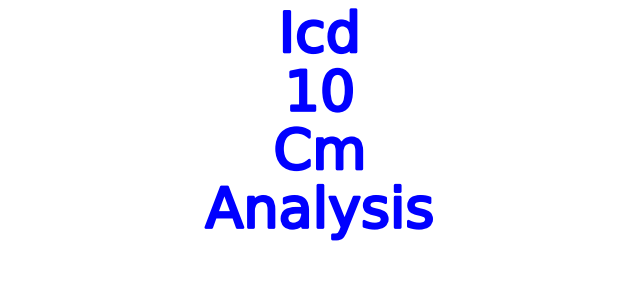

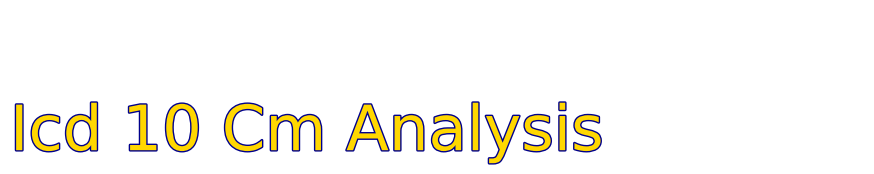

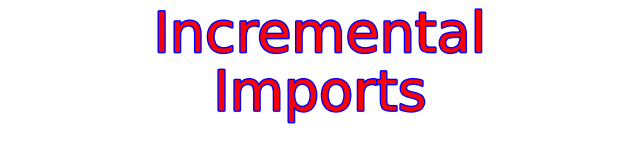

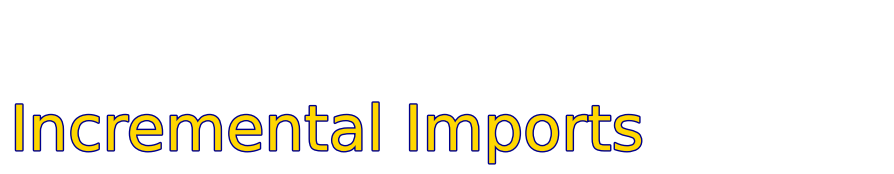

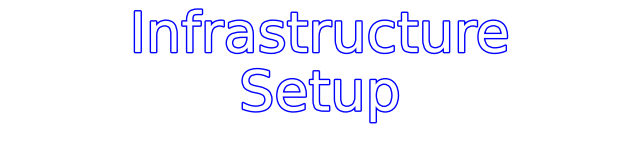

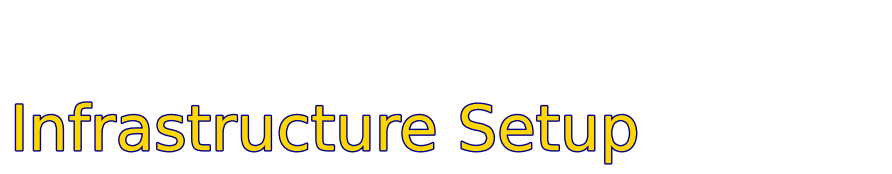

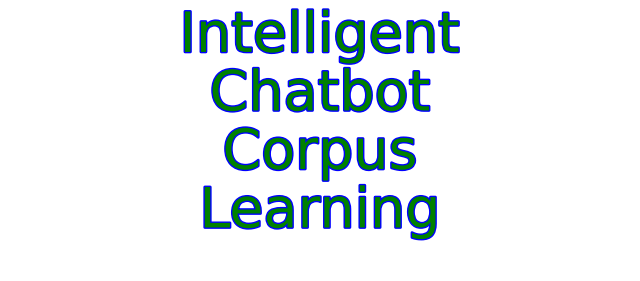

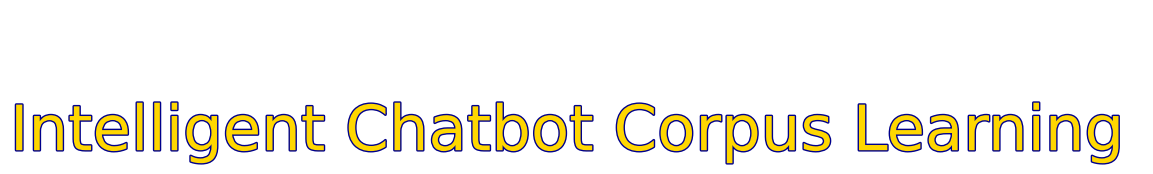

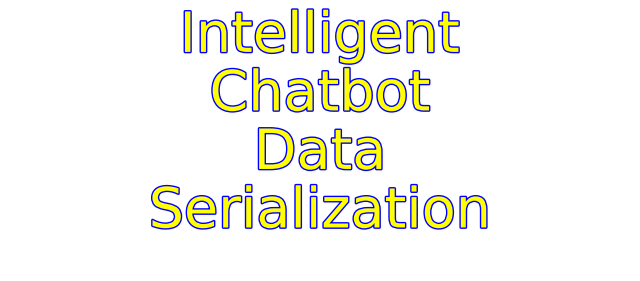

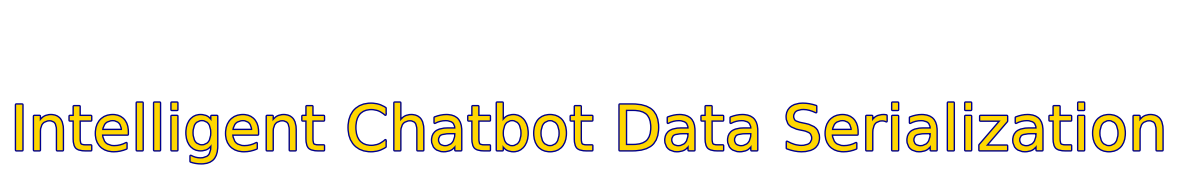

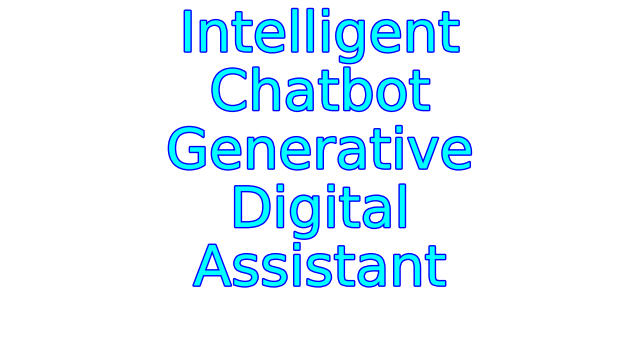

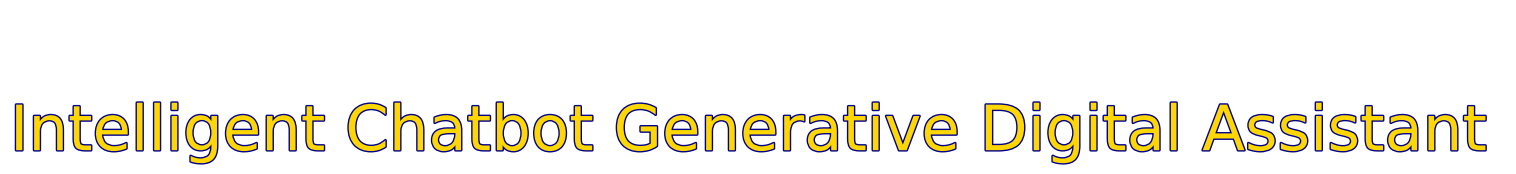

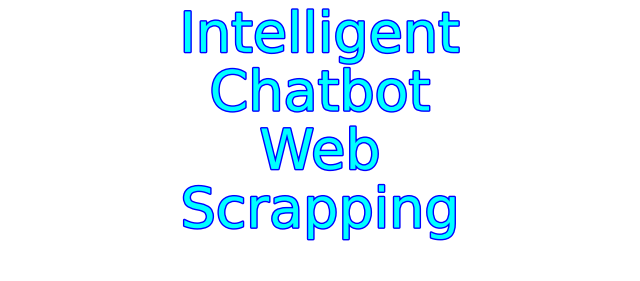

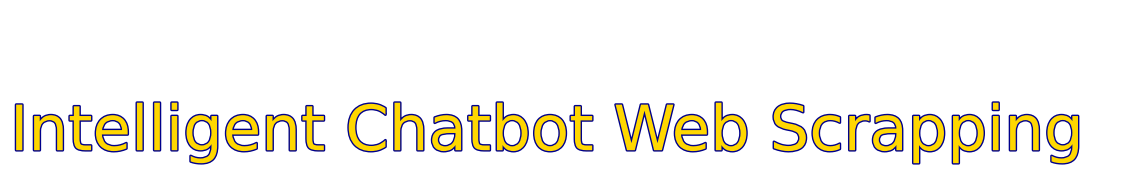

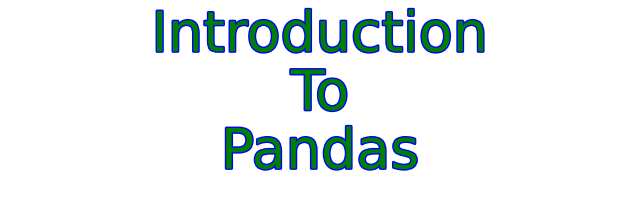

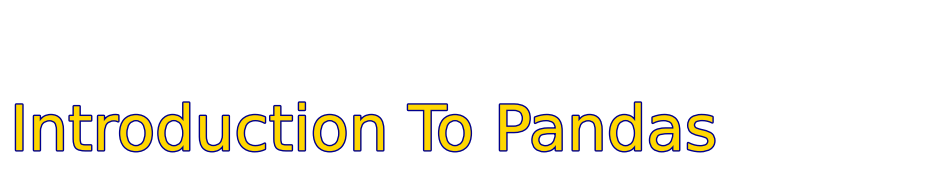

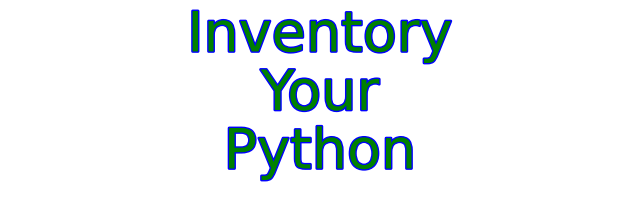

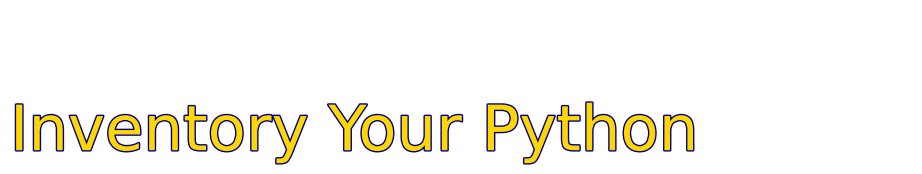

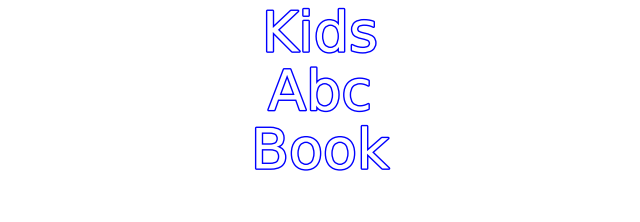

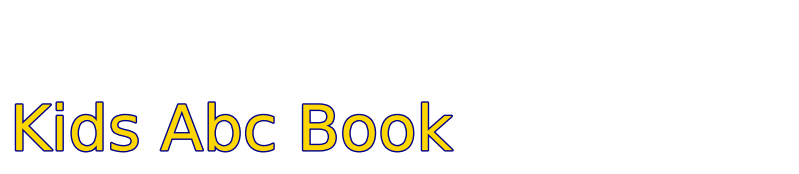

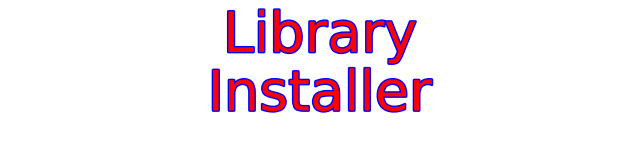

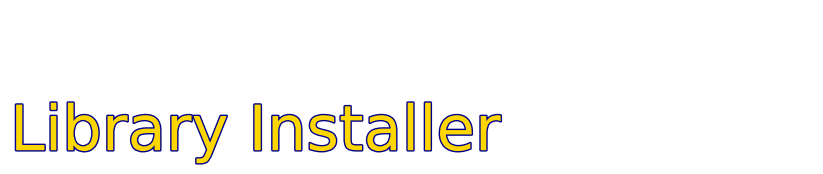

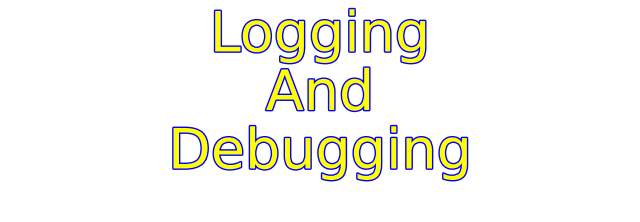

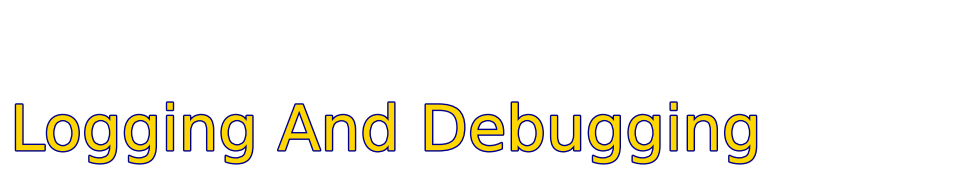

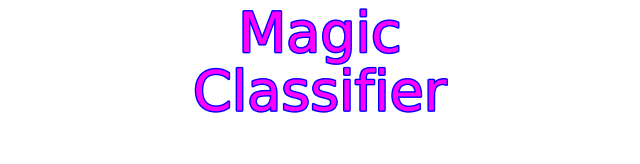

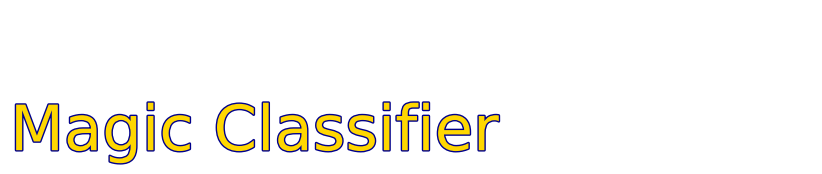

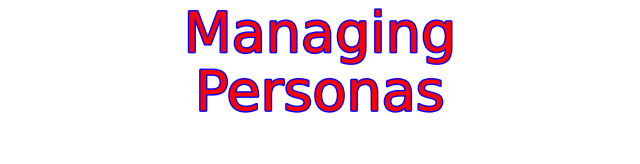

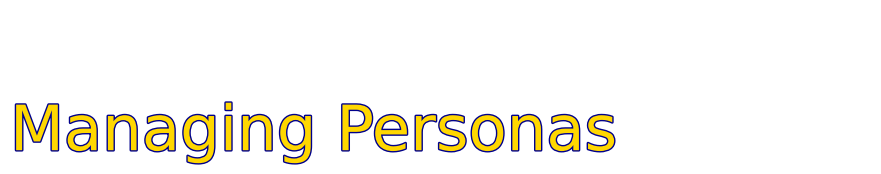

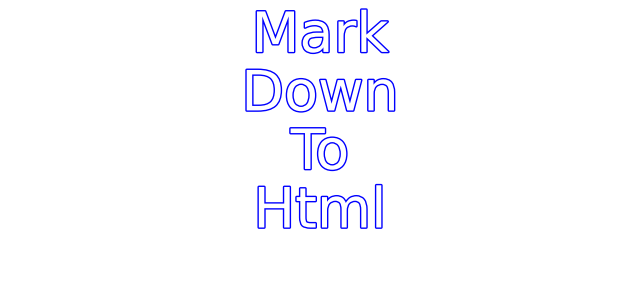

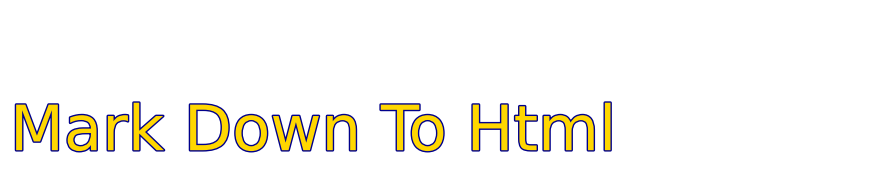

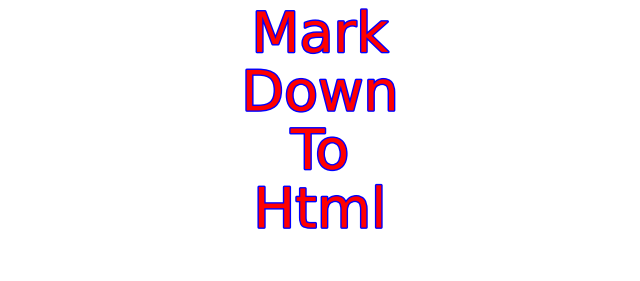

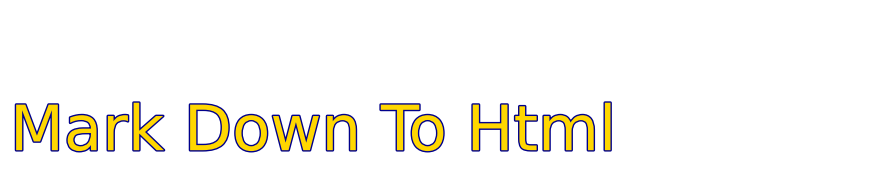

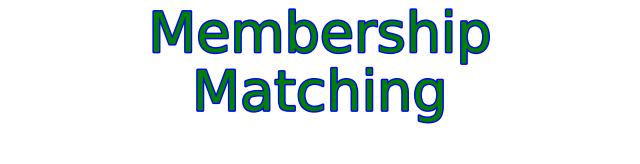

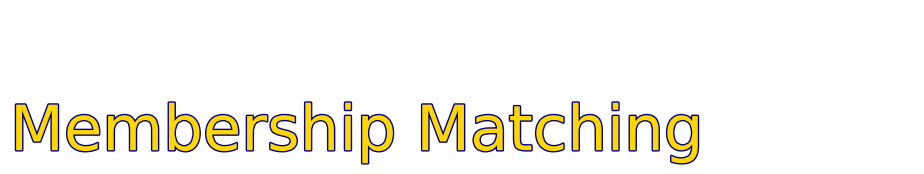

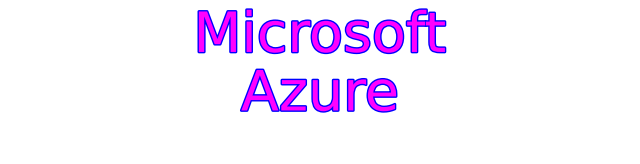

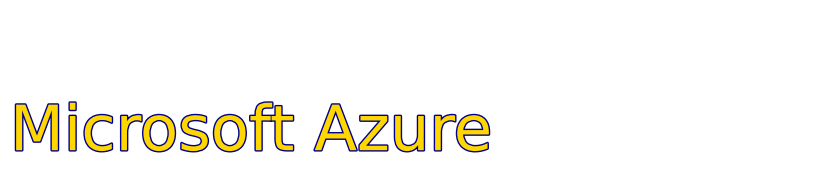

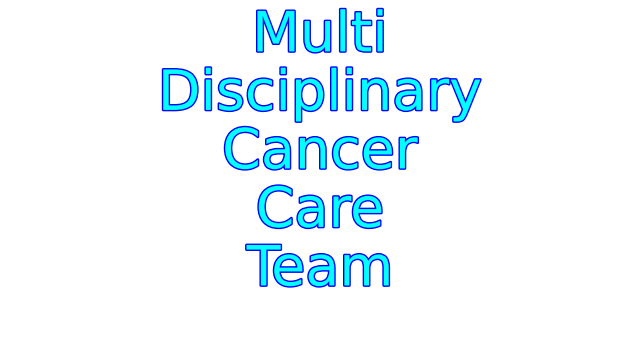

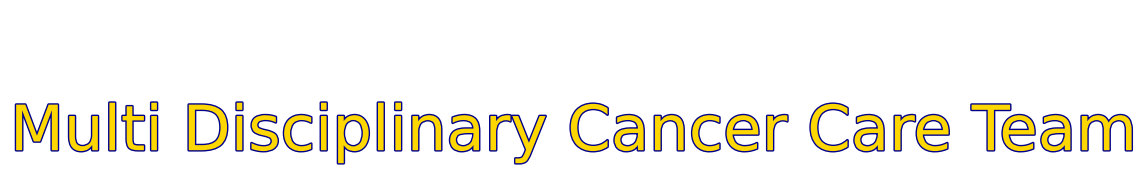

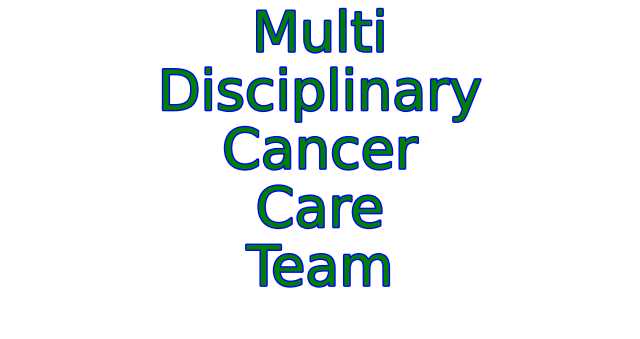

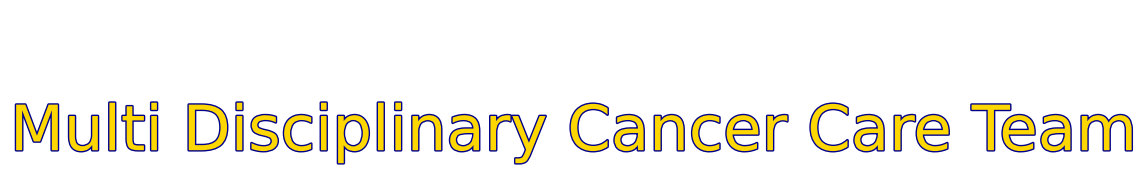

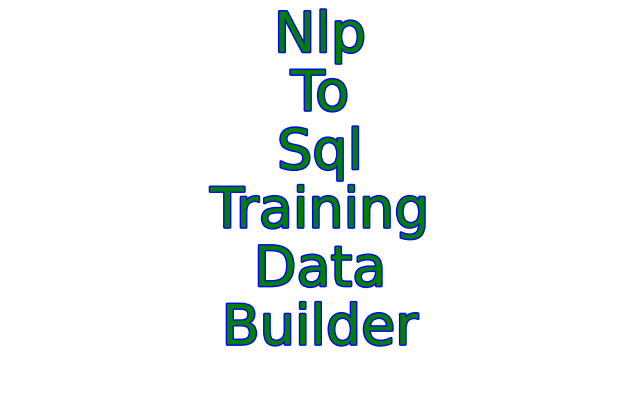

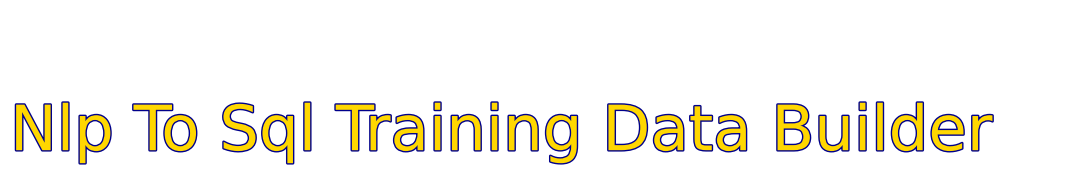

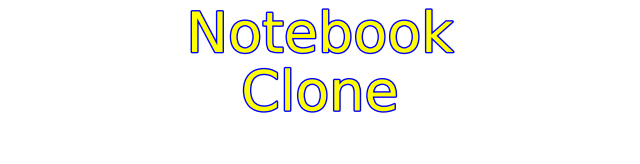

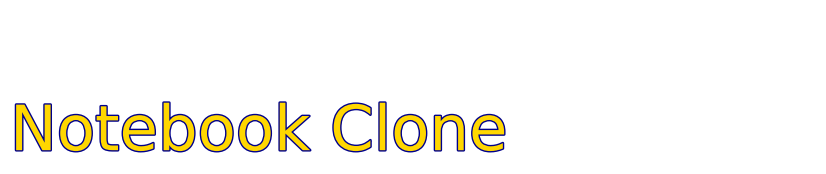

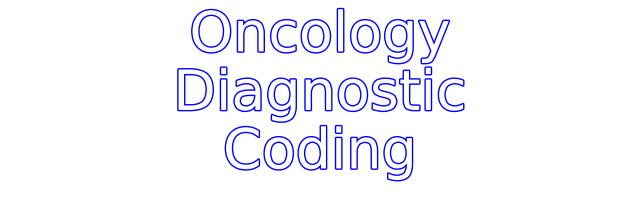

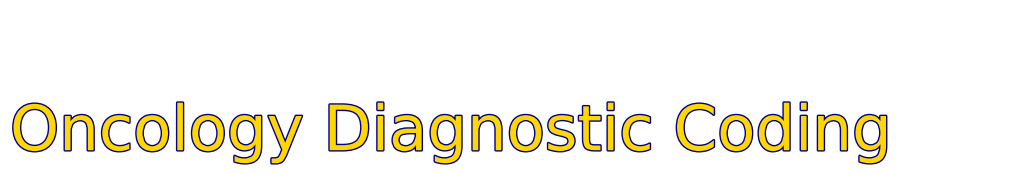

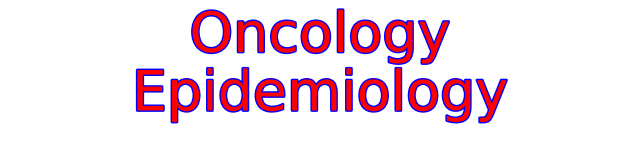

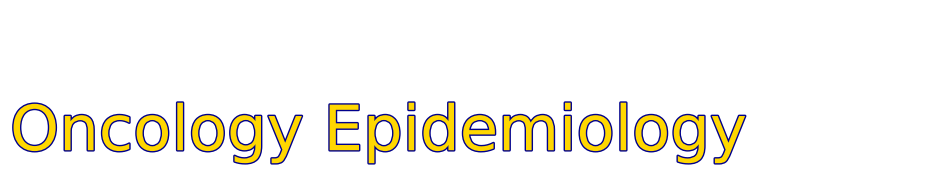

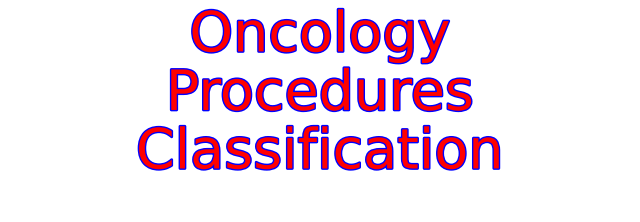

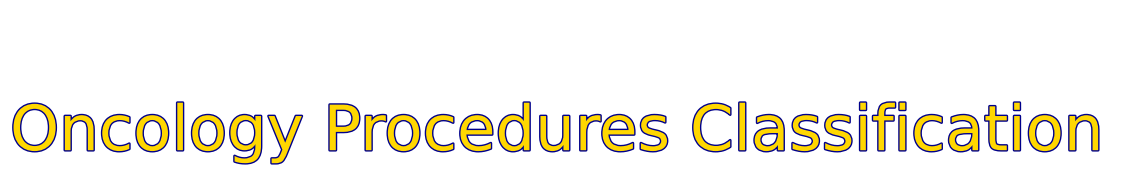

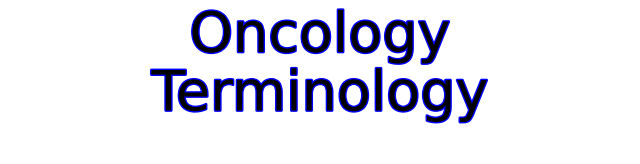

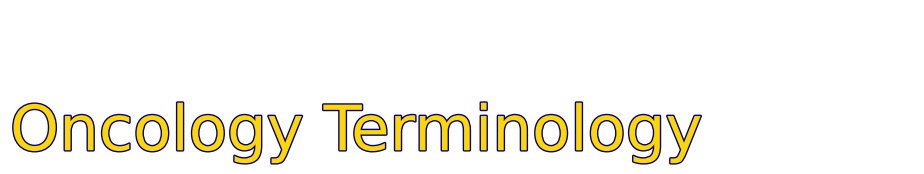

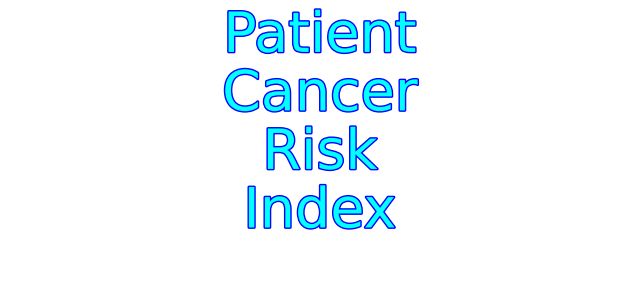

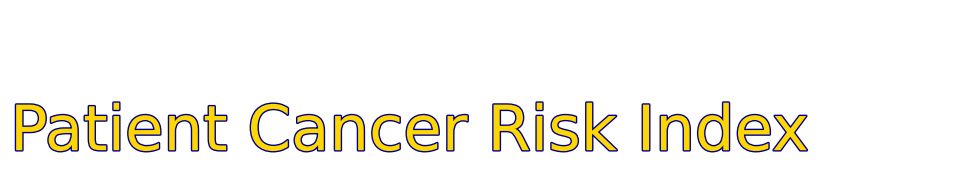

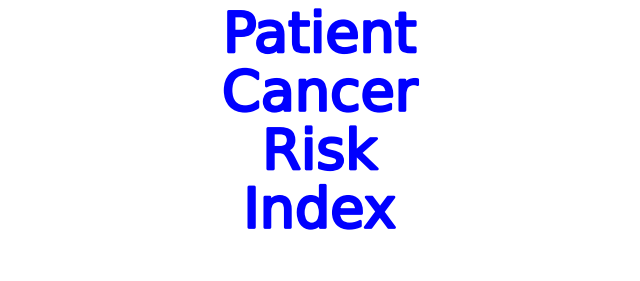

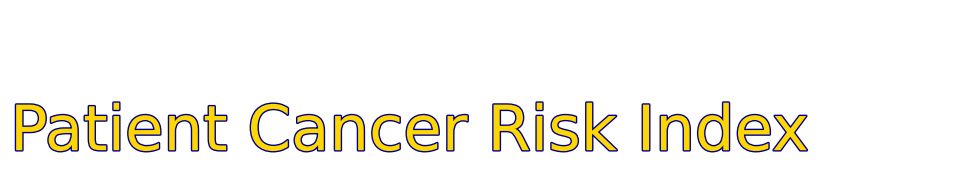

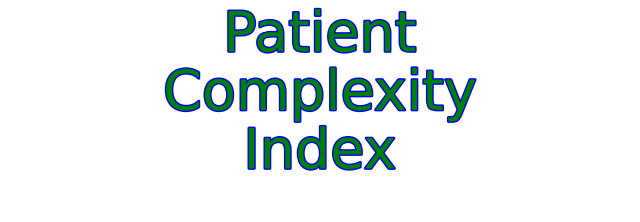

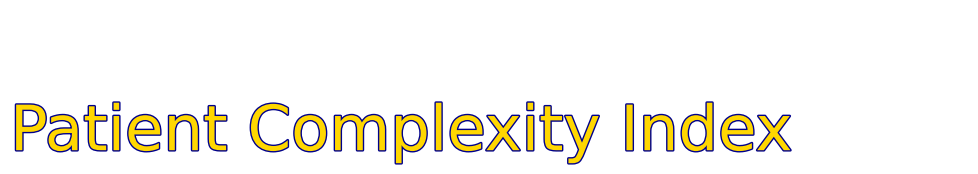

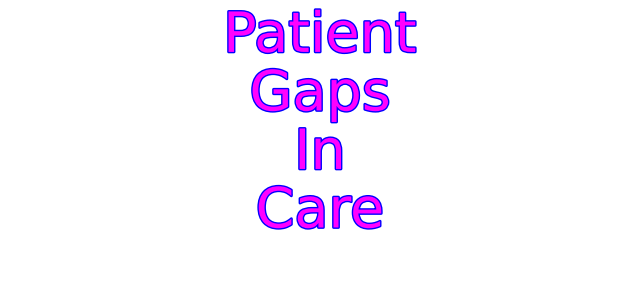

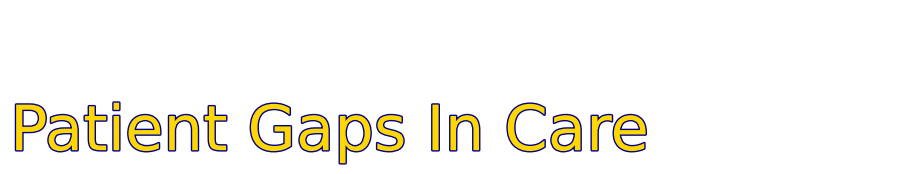

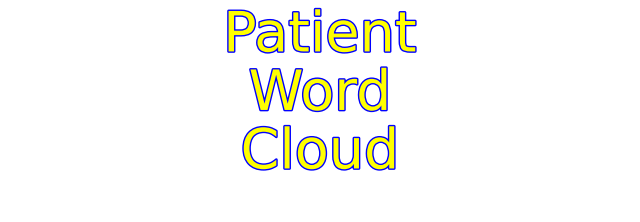

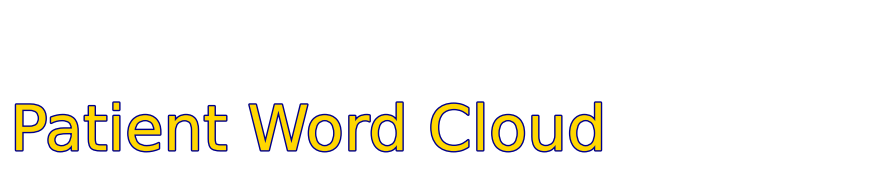

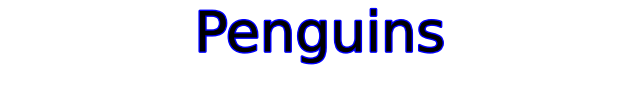

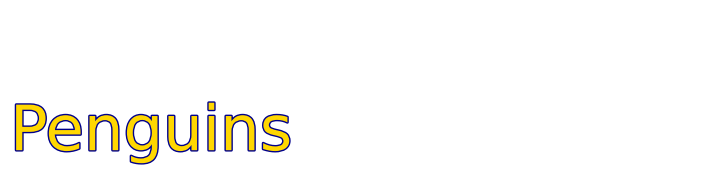

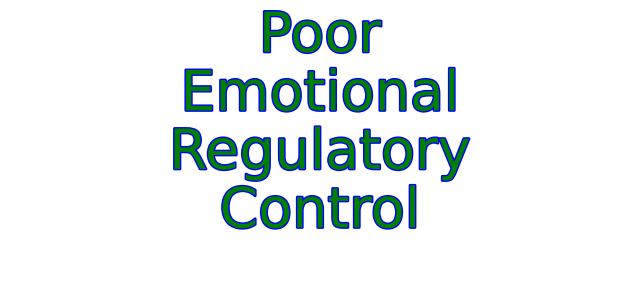

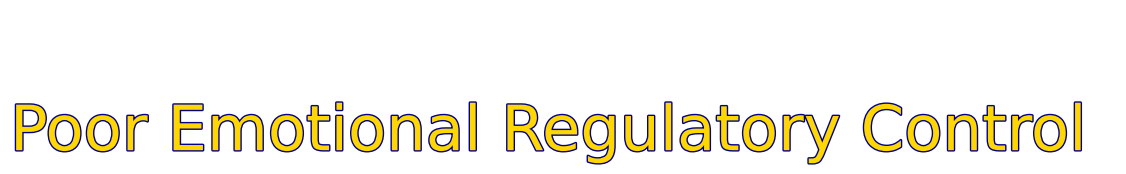

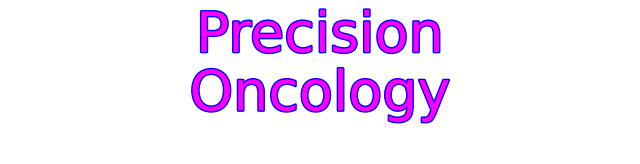

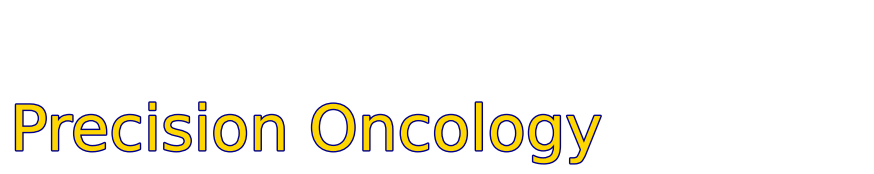

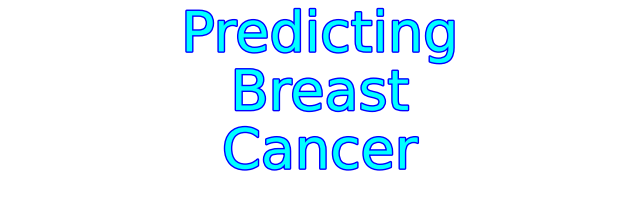

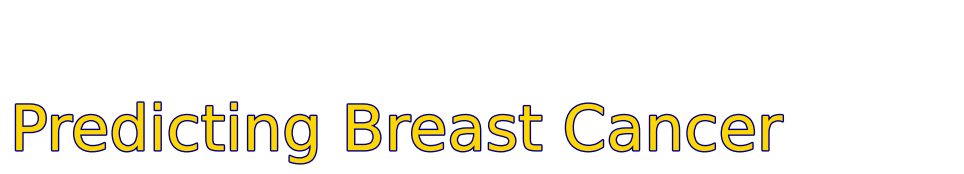

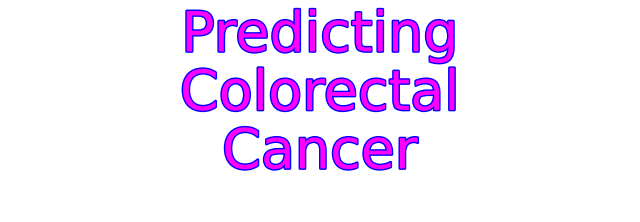

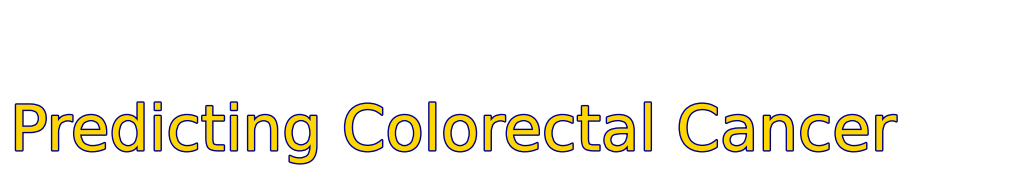

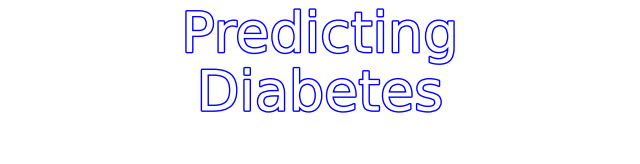

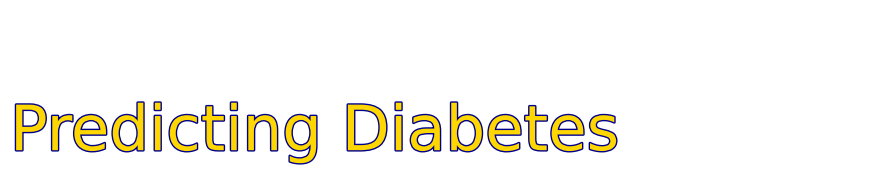

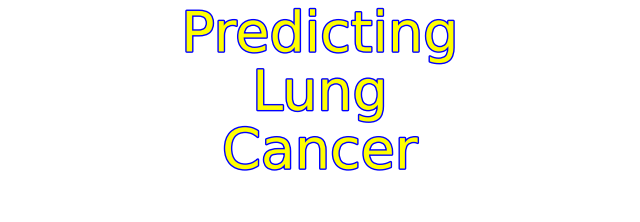

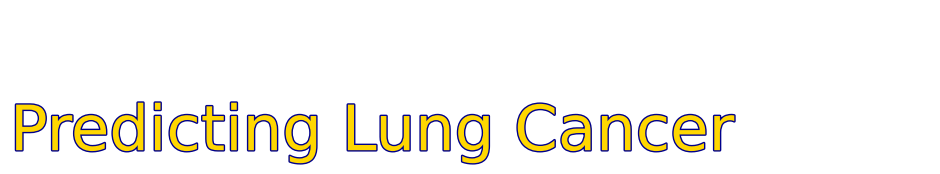

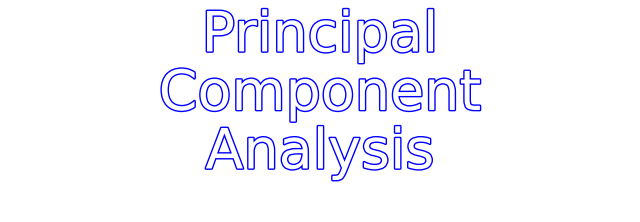

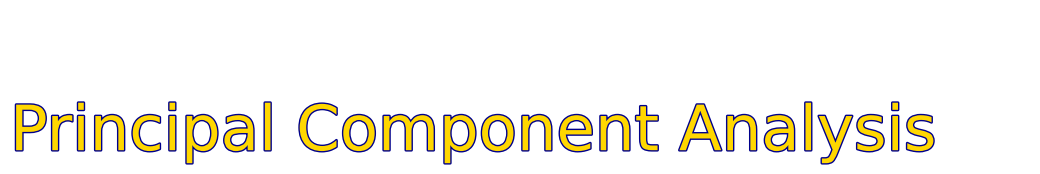

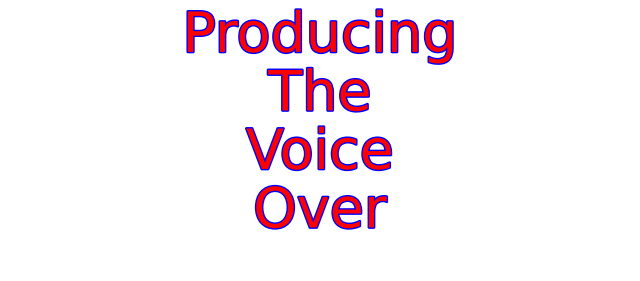

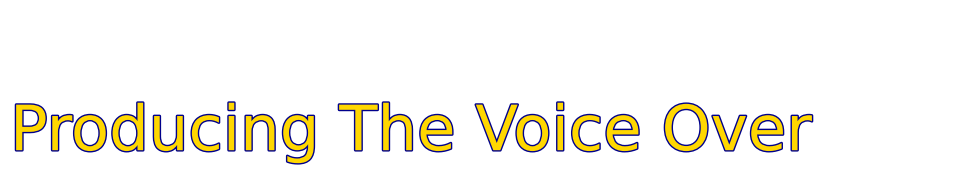

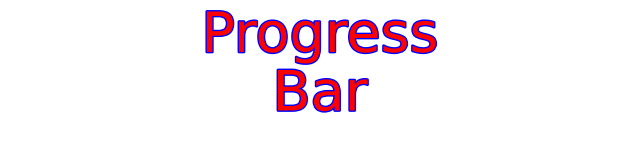

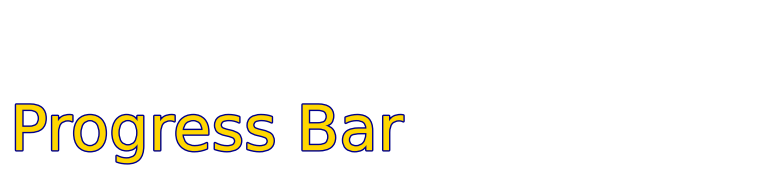

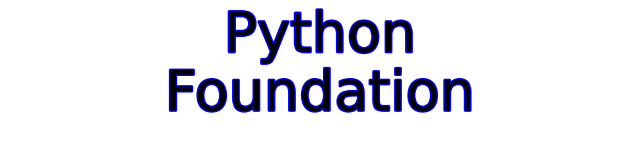

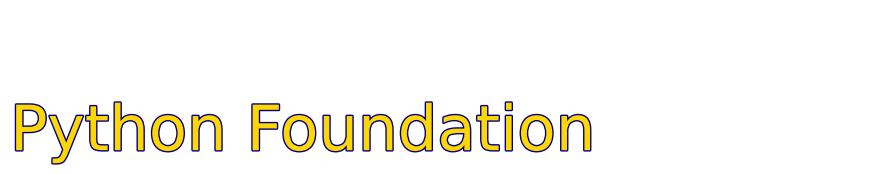

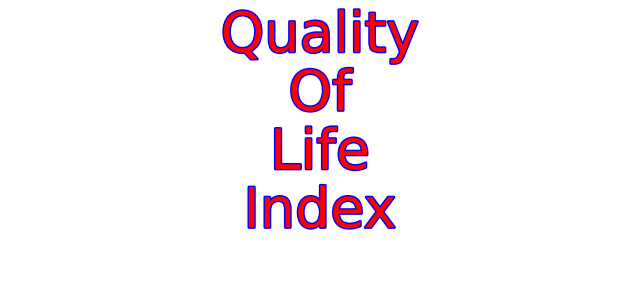

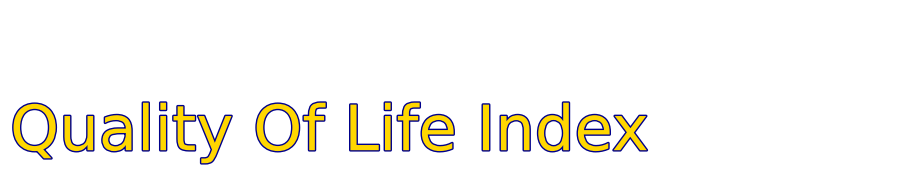

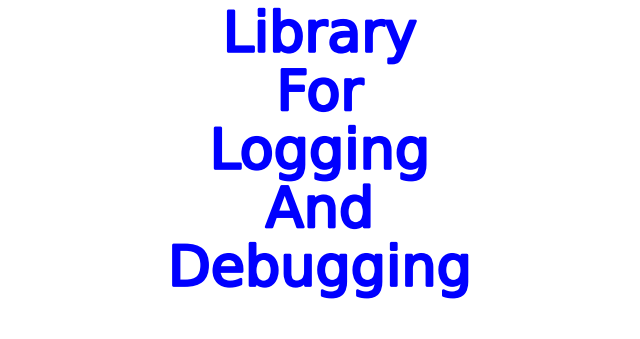

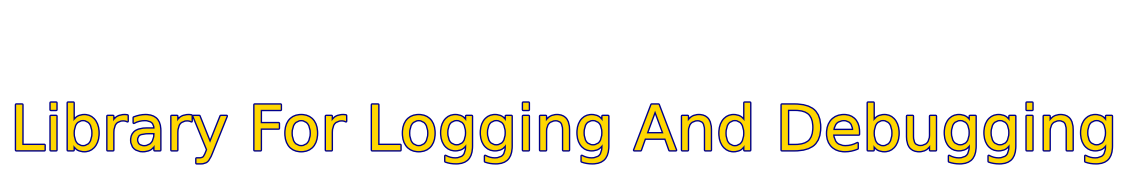

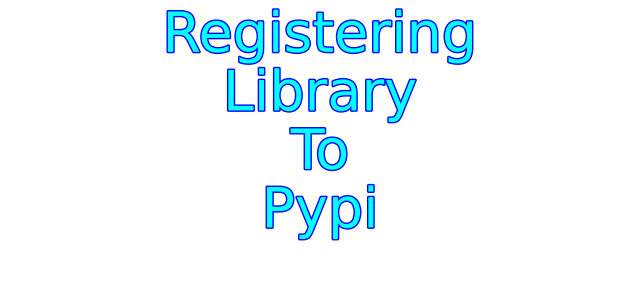

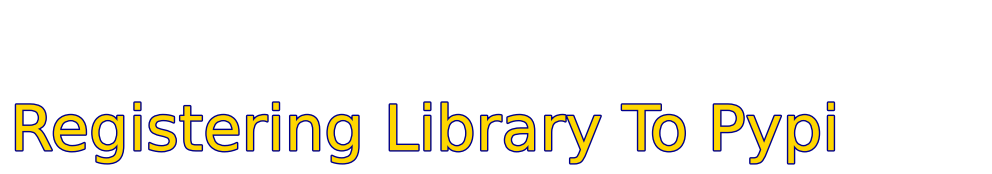

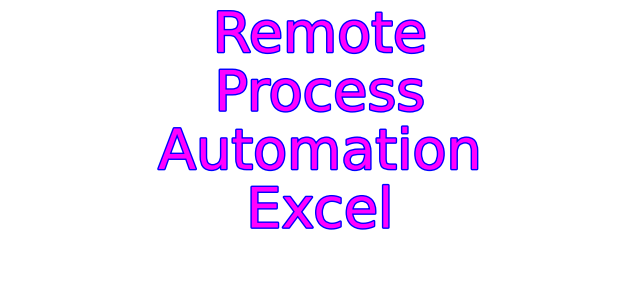

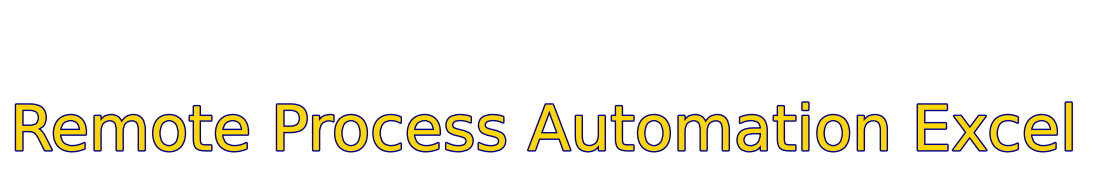

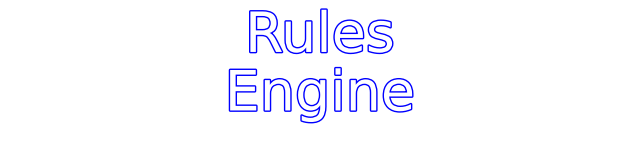

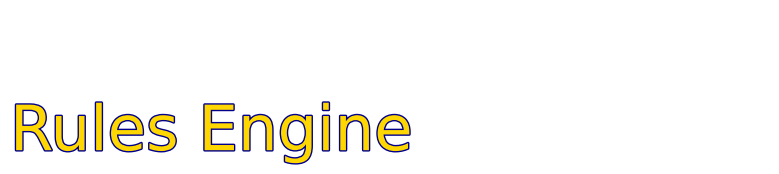

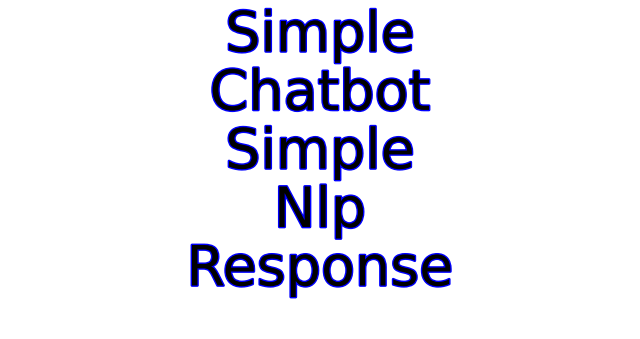

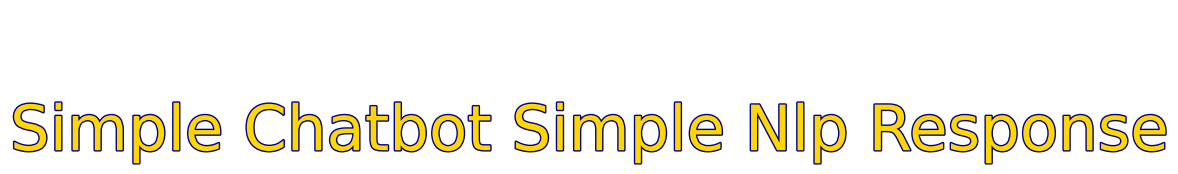

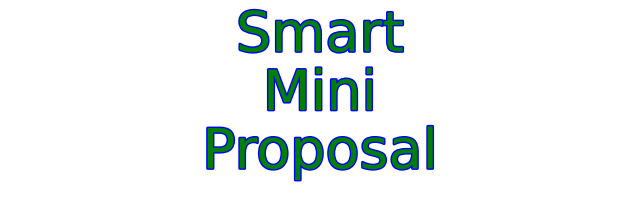

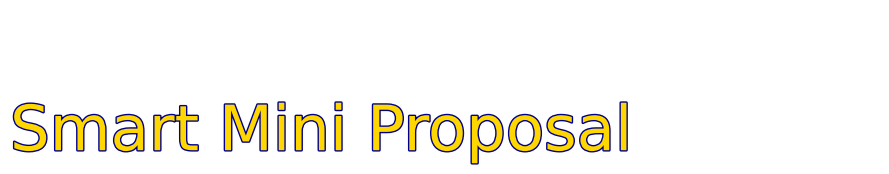

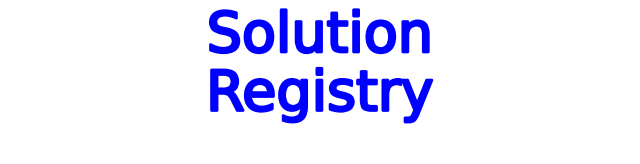

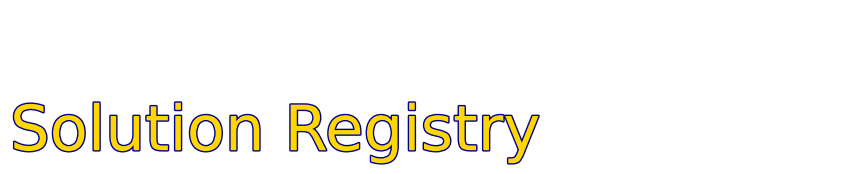

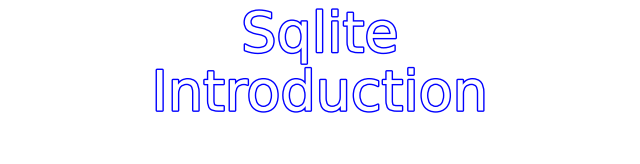

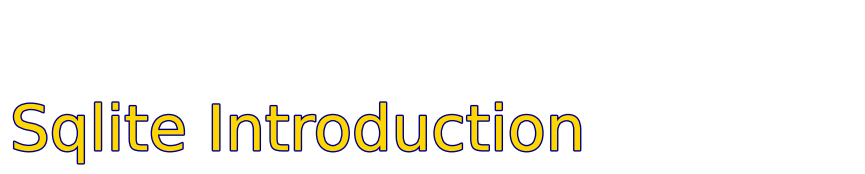

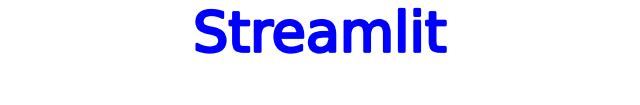

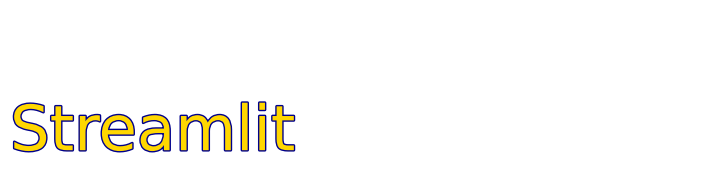

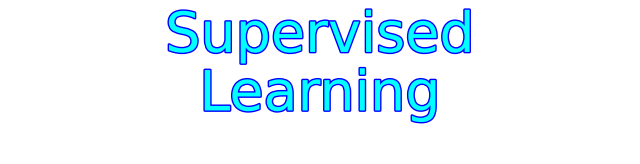

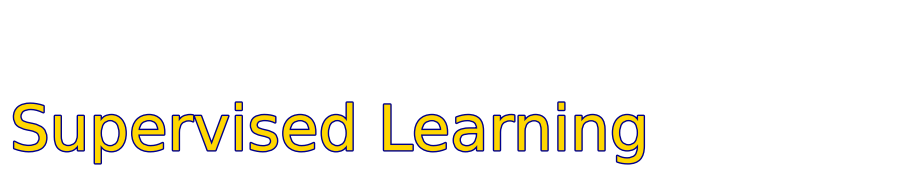

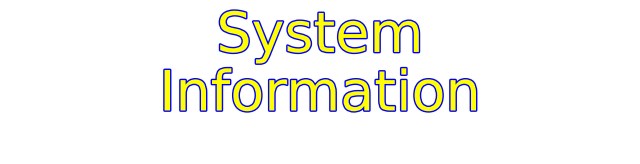

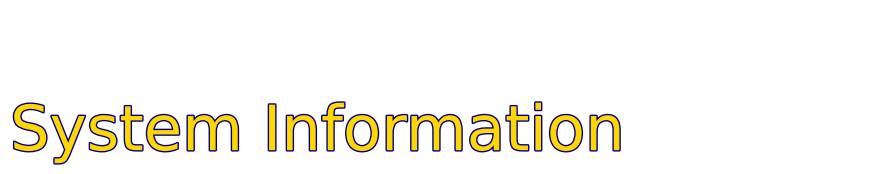

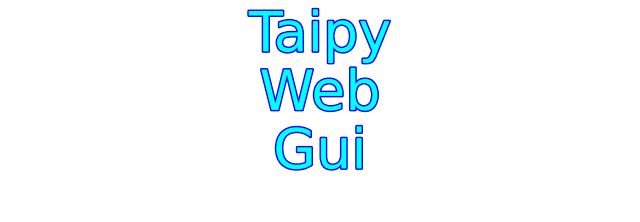

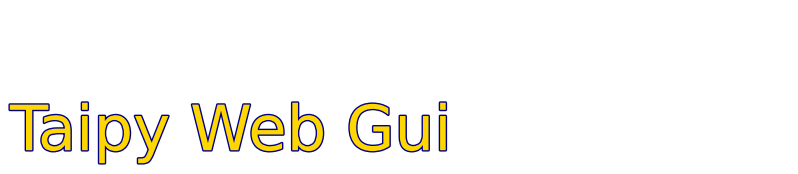

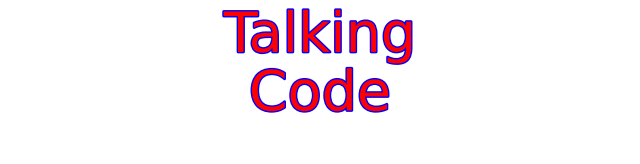

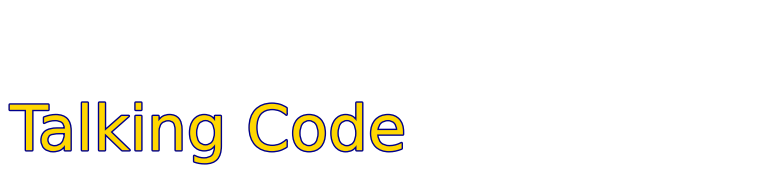

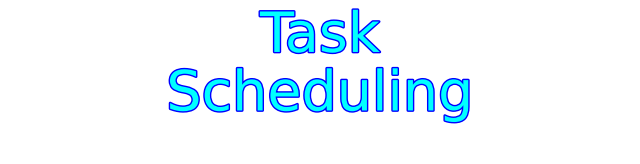

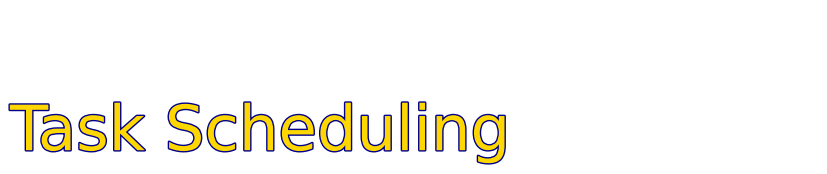

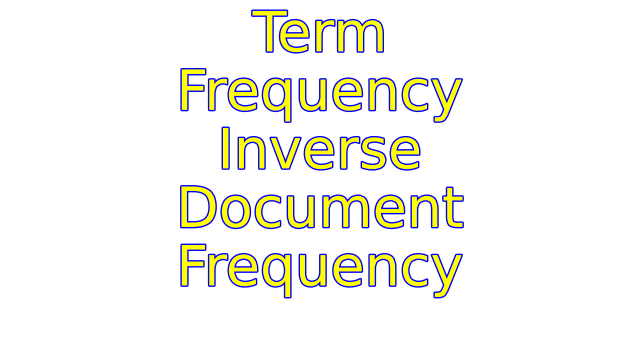

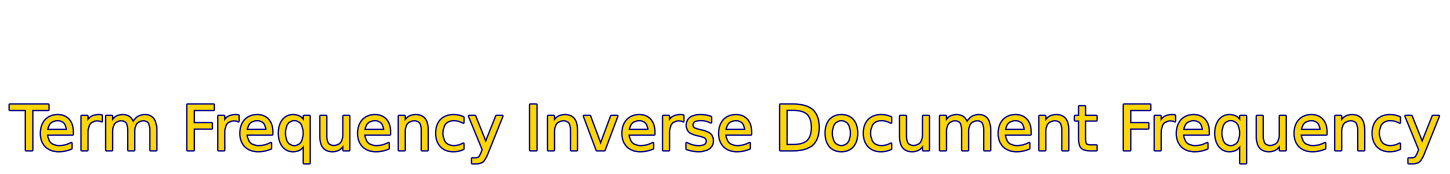

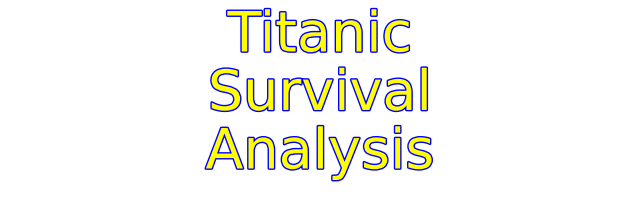

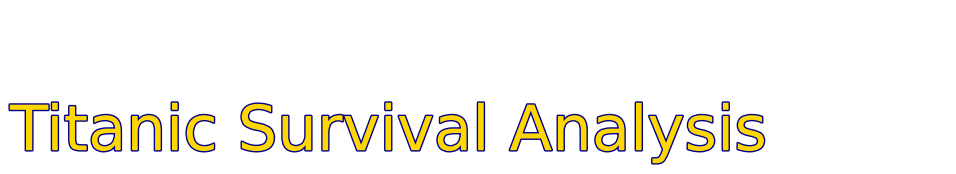

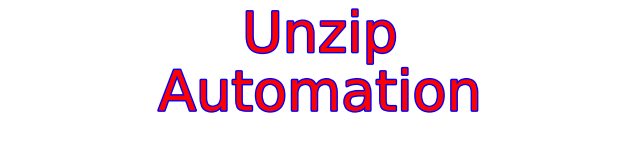

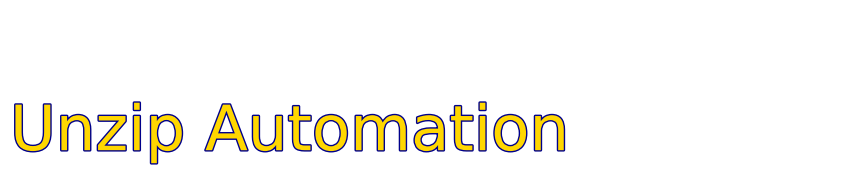

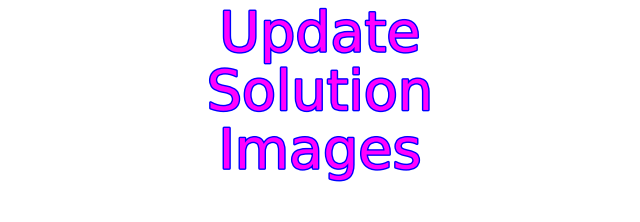

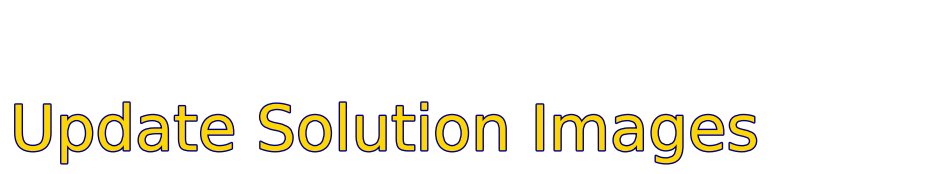

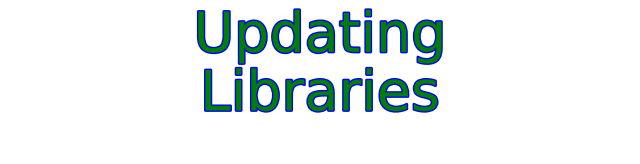

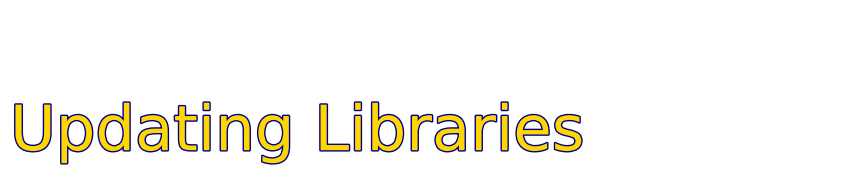

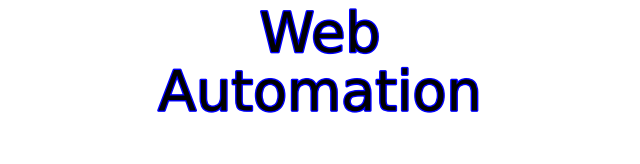

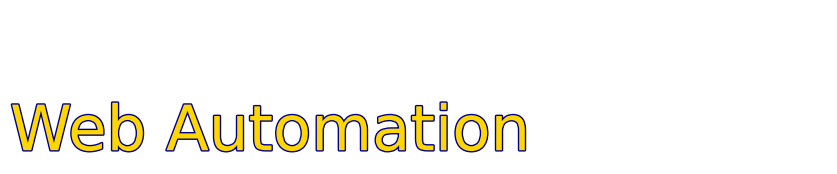

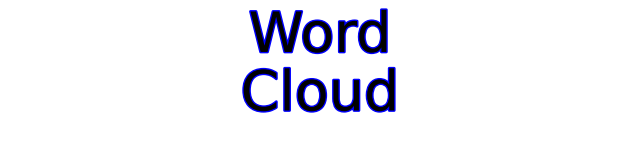

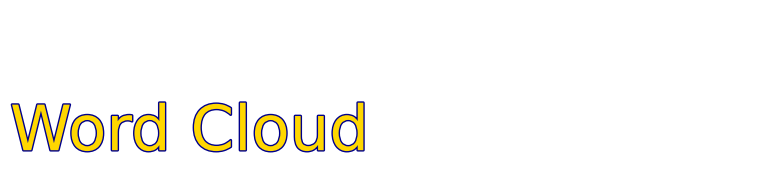

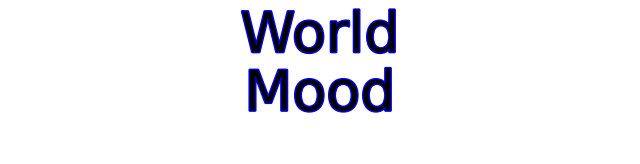

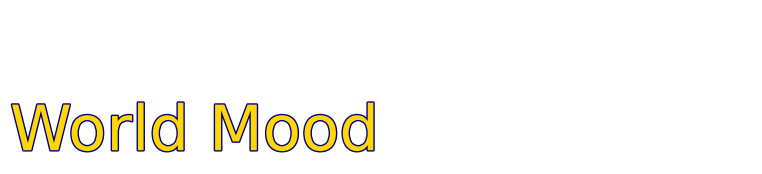

In [12]:
creating_signs = True
if creating_signs: 
    cs.create_solution_sign(df_solution_registry)

In [13]:
definition = '''
## 🎨🖌️  Create Solution Sign

The **create_solution_sign** function generates a unique sign for each solution name, ensuring distinct visual representation for every solution.

**Automated sign painting** utilizes computerized systems to create signage with precision and efficiency. These systems can generate signs of any font size or color, allowing for versatility in design. By leveraging automated processes, businesses can produce signage quickly and accurately, saving time and resources. Additionally, the signs are typically saved as .PNG files, ensuring compatibility across various platforms and ease of distribution. This approach streamlines the sign-making process, resulting in high-quality output while minimizing manual labor and errors.

**Matplotlib** is a powerful Python library for creating static, interactive, and animated **visualizations**. It offers a wide range of plotting functionalities, enabling users to generate high-quality graphs, charts, and plots for data analysis and presentation purposes.
''' 
sb.start_story(definition)


## 🎨🖌️  Create Solution Sign

The **create_solution_sign** function generates a unique sign for each solution name, ensuring distinct visual representation for every solution.

**Automated sign painting** utilizes computerized systems to create signage with precision and efficiency. These systems can generate signs of any font size or color, allowing for versatility in design. By leveraging automated processes, businesses can produce signage quickly and accurately, saving time and resources. Additionally, the signs are typically saved as .PNG files, ensuring compatibility across various platforms and ease of distribution. This approach streamlines the sign-making process, resulting in high-quality output while minimizing manual labor and errors.

**Matplotlib** is a powerful Python library for creating static, interactive, and animated **visualizations**. It offers a wide range of plotting functionalities, enabling users to generate high-quality graphs, charts, and plots for data analysis and presentation purposes.


## Step 0 - Process End - display log

In [14]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2025-11-12 10:48:06,966 - INFO - START create_solution_sign =============================================
2025-11-12 10:48:06,966 - INFO - START create_solution_sign Start Time = 2025-11-12 10:48:06
2025-11-12 10:48:06,966 - INFO - create_solution_sign Step 0 - Initialize the configuration file parser
2025-11-12 10:48:06,966 - INFO - Process create_solution_sign Step 0 - Initializing and starting Logging Process.
2025-11-12 10:48:25,396 - INFO - PERFORMANCE create_solution_sign The total process duration was:18.43
2025-11-12 10:48:25,396 - INFO - PERFORMANCE create_solution_sign Stop Time = 2025-11-12 10:48:25
2025-11-12 10:48:25,396 - INFO - PERFORMANCE create_solution_sign Low process duration less than 3 minutes:18.43
2025-11-12 10:48:25,396 - INFO - PERFORMANCE create_solution_sign Performance optimization is optional
2025-11-12 10:48:25,396 - INFO - END create_solution_sign =============================================



#### https://github.com/JoeEberle/ -- josepheberle@outlook.com